# Business case

- **Problem Statement :**
  - we need to identify which customers will make a specific transactio 
in the future, irrespective of the amount of money transacted.
- **Data Detais:** 
  - Provided with an anonymized dataset containing 200 numeric feature variables, the
binary target column, and a string ID_code co
- **Problem Anaysis:** 
  - This is a binary classification problem under supervised machine learning algorithm.
The task is to predict the value of target column in the test set.st set.

# Importing Library ,Function and Dataset

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import warnings as wn
wn.filterwarnings('ignore')
pd.set_option('display.max_columns', None)



In [2]:
def outliers_iqr(df1,target_column):
    df=df1.drop(columns=target_column)
    outlier_free=df1.copy
    N_col=[]
    C_col=[]
    N_col = df.select_dtypes(include='number')
    C_col = df.select_dtypes(include='object')
    #outlier_columns=pd.dataframe({colmn_name:[],len_outliers:[],percentile:[]})
    outlier_columns = pd.DataFrame(columns=['column_name', 'len_outliers', 'percentile'])
    no_outlier_columns=[]
    z=1
    c=0
    for x in  N_col.columns:
        q1=df[x].quantile(0.25)
        q3=df[x].quantile(0.75)
        iqr=q3-q1
        print(x)
        outliers = df[(df[x] > q3 + (1.5 * iqr)) | (df[x] < q1 - (1.5 * iqr))]
        print(len(outliers))
        if len(outliers)==0:
            no_outlier_columns.append(x)
            pass
        else:
            print('upper_fence :' , q3 + (1.5 * iqr))
            print('lower_fence :'  ,q1 - (1.5 * iqr))
            print(outliers[x])
            outlier_columns.loc[len(outlier_columns)] = [x, len(outliers), ((len(outliers))/(len(df[x]))*100)]
            #outlier_columns[percentile].append((len(outliers))/(len(df[x]))*100)
            print('as of now the no of coumns is =',z)
            c=c+len(outliers)
            print('as of now the total no of outlier is =',c)
            z+=1
            indices_to_drop = outliers.index.intersection(df1.index)
            df1 = df1.drop(indices_to_drop)

            
            
        print('******************************************')
        outlier_free=df1.copy()
    s=outlier_columns
    d=no_outlier_columns
    #print('columns with outliers are :',outlier_columns)
    #print('columns without outliers are :',no_outlier_columns)
    # ex; out_colmns,no.out_columns=outliers_iqr(data)
    outlier_columns.sort_values('len_outliers').plot(kind='barh', figsize=(14, 40), x='column_name', y='len_outliers')
    plt.xlabel('Number of outliers')
    plt.show()
    return outlier_columns,no_outlier_columns,outlier_free





In [3]:
def correlation(dataset, threshold,Abs):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if Abs==True:
                if abs(corr_matrix.iloc[i, j]) > threshold:
                    # we are interested in absolute coeff value
                    colname = corr_matrix.columns[i]  # getting the name of column
                    col_corr.add(colname)
            if Abs==False:
                if (corr_matrix.iloc[i, j]) > threshold:
                    # we are not interested in absolute coeff value
                    colname = corr_matrix.columns[i]  # getting the name of column
                    col_corr.add(colname)
    return col_corr

In [4]:
def chauvenet(array):
    from scipy.special import erfc
    mean = array.mean()           
    stdv = array.std()            
    N = len(array)                
    criterion = 1.0/(2*N)         
    d = abs(array-mean)/stdv      
    prob = erfc(d) # calculate prob probability of each data point under the normal distribution with the calculated mean and standard deviation.   
    return prob < criterion       

In [5]:
## visualizing the roc plot
def plot_roc_curve(fpr, tpr):# function to plot roc curve
    plt.plot(fpr, tpr, color='orange', label='ROC')#line plot between fpr and tpr
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')# assigning name to  x axis
    plt.ylabel('True Positive Rate')# assigning name to y axis
    plt.title('Receiver Operating Characteristic (ROC) Curve')#assigning name to curve  
    plt.legend()#area describing the elements of the graph
    plt.show()#to show graph without location

## data input

In [6]:
data=pd.read_csv(r"C:\Users\ALTRIN JINO\OneDrive\Desktop\Project\Transaction\train(1).csv")
data

ID_code  target    var_0   var_1    var_2   var_3    var_4  \
0            train_0       0   8.9255 -6.7863  11.9081  5.0930  11.4607   
1            train_1       0  11.5006 -4.1473  13.8588  5.3890  12.3622   
2            train_2       0   8.6093 -2.7457  12.0805  7.8928  10.5825   
3            train_3       0  11.0604 -2.1518   8.9522  7.1957  12.5846   
4            train_4       0   9.8369 -1.4834  12.8746  6.6375  12.2772   
...              ...     ...      ...     ...      ...     ...      ...   
199995  train_199995       0  11.4880 -0.4956   8.2622  3.5142  10.3404   
199996  train_199996       0   4.9149 -2.4484  16.7052  6.6345   8.3096   
199997  train_199997       0  11.2232 -5.0518  10.5127  5.6456   9.3410   
199998  train_199998       0   9.7148 -8.6098  13.6104  5.7930  12.5173   
199999  train_199999       0  10.8762 -5.7105  12.1183  8.0328  11.5577   

          var_5   var_6    var_7   var_8   var_9  var_10   var_11   var_12  \
0       -9.2834  5.1187  18.6266 -4.9200  5.7470  2.9252   3.1821  14.0137   
1        7.0433  5.6208  16.5338  3.1468  8.0851 -0.4032   8.0585  14.0239   
2       -9.0837  6.9427  14.6155 -4.9193  5.9525 -0.3249 -11.2648  14.1929   
3       -1.8361  5.8428  14.9250 -5.8609  8.2450  2.3061   2.8102  13.8463   
4        2.4486  5.9405  19.2514  6.2654  7.6784 -9.4458 -12.1419  13.8481   
...         ...     ...      ...     ...     ...     ...      ...      ...   
199995  11.6081  5.6709  15.1516 -0.6209  5.6669  3.7574  -9.5348  13.9860   
199996 -10.5628  5.8802  21.5940 -3.6797  6.0019  6.5576 -11.8776  14.4131   
199997  -5.4086  4.5555  21.5571  0.1202  6.1629  4.4004  -0.4651  13.8775   
199998   0.5339  6.0479  17.0152 -2.1926  8.7542  1.4245   0.7086  14.2110   
199999   0.3488  5.2839  15.2058 -0.4541  9.3688 -7.3826  -8.7049  14.2486   

         var_13   var_14   var_15   var_16   var_17   var_18   var_19  \
0        0.5745   8.7989  14.5691   5.7487  -7.2393   4.2840  30.7133   
1        8.4135   5.4345  13.7003  13.8275 -15.5849   7.8000  28.5708   
2        7.3124   7.5244  14.6472   7.6782  -1.7395   4.7011  20.4775   
3       11.9704   6.4569  14.8372  10.7430  -0.4299  15.9426  13.7257   
4        7.8895   7.7894  15.0553   8.4871  -3.0680   6.5263  11.3152   
...         ...      ...      ...      ...      ...      ...      ...   
199995   5.2982   8.2705  14.1527   7.4540  -5.0105  12.0465   8.6349   
199996   3.3087   3.5800  14.1597   7.5191  -8.8715  17.9467  17.0237   
199997   9.7414  10.9044  14.5597   9.6214  -1.6429  23.1127  12.1517   
199998   6.5641   7.6177  13.8771   9.0479 -11.8164  14.0831  -2.0345   
199999  15.0849   5.2313  14.3572  12.5523  -6.5066  11.3592  11.4779   

         var_20   var_21   var_22  var_23   var_24   var_25   var_26  var_27  \
0       10.5350  16.2191   2.5791  2.4716  14.3831  13.4325  -5.1488 -0.4073   
1        3.4287   2.7407   8.5524  3.3716   6.9779  13.8910 -11.7684 -2.5586   
2       17.7559  18.1377   1.2145  3.5137   5.6777  13.2177  -7.9940 -2.9029   
3       20.3010  12.5579   6.8202  2.7229  12.1354  13.7367   0.8135 -0.9059   
4       21.4246  18.9608  10.1102  2.7142  14.2080  13.5433   3.1736 -3.3423   
...         ...      ...      ...     ...      ...      ...      ...     ...   
199995   9.9137  25.1376   1.0914  3.2326   7.7802  13.9939   2.9085  0.1005   
199996   6.6459  18.2345   0.8982  2.2532  15.4977  13.3282   5.2281 -3.7424   
199997  16.2577   3.1453   3.1008  2.1497  10.2715  13.5637   4.9473 -0.9905   
199998  18.3863   3.0911   5.5803  3.7091  12.8219  13.8866  -3.3859 -0.4440   
199999  15.4997   3.8474   2.4381  2.8295  10.6681  13.7167  -7.7771 -2.7798   

        var_28  var_29   var_30   var_31  var_32   var_33   var_34   var_35  \
0       4.9306  5.9965  -0.3085  12.9041 -3.8766  16.8911  11.1920  10.5785   
1       5.0464  0.5481  -9.2987   7.8755  1.2859  19.3710  11.3702   0.7399   
2       5.8463  6.1439 -11.1025  12.4858 -2.2871  19.0422  11.0449   4.1087   
3       5.9070  2.840

In [7]:
data.index

RangeIndex(start=0, stop=200000, step=1)

# Data analysis

### Data types

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [9]:
data['ID_code'].dtype

dtype('O')

In [10]:
data['target'].dtype

dtype('int64')

- **Data Type Handling:** 
  - One column is of object data type, which may require encoding or transformatio or dropedn depending on its content.
- **Target Variable:**
  - The target variable is binary with values 0 and 1, indicating a classification problem.
- **Feature Variables:**
  - There are around 200 columns with float data type, suggesting a significant number of features for modeling. Consider feature selection or dimensionality reduction techniques to manage complexity and computational resources.

### Data description

In [11]:
data.describe(include='all')

ID_code         target          var_0          var_1          var_2  \
count    200000  200000.000000  200000.000000  200000.000000  200000.000000   
unique   200000            NaN            NaN            NaN            NaN   
top     train_0            NaN            NaN            NaN            NaN   
freq          1            NaN            NaN            NaN            NaN   
mean        NaN       0.100490      10.679914      -1.627622      10.715192   
std         NaN       0.300653       3.040051       4.050044       2.640894   
min         NaN       0.000000       0.408400     -15.043400       2.117100   
25%         NaN       0.000000       8.453850      -4.740025       8.722475   
50%         NaN       0.000000      10.524750      -1.608050      10.580000   
75%         NaN       0.000000      12.758200       1.358625      12.516700   
max         NaN       1.000000      20.315000      10.376800      19.353000   

                var_3          var_4          var_5          var_6  \
count   200000.000000  200000.000000  200000.000000  200000.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean         6.796529      11.078333      -5.065317       5.408949   
std          2.043319       1.623150       7.863267       0.866607   
min         -0.040200       5.074800     -32.562600       2.347300   
25%          5.254075       9.883175     -11.200350       4.767700   
50%          6.825000      11.108250      -4.833150       5.385100   
75%          8.324100      12.261125       0.924800       6.003000   
max         13.188300      16.671400      17.251600       8.447700   

                var_7          var_8          var_9         var_10  \
count   200000.000000  200000.000000  200000.000000  200000.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean        16.545850       0.284162       7.567236       0.394340   
std          3.418076       3.332634       1.235070       5.500793   
min          5.349700     -10.505500       3.970500     -20.731300   
25%         13.943800      -2.317800       6.618800      -3.594950   
50%         16.456800       0.393700       7.629600       0.487300   
75%         19.102900       2.937900       8.584425       4.382925   
max         27.691800      10.151300      11.150600      18.670200   

               var_11         var_12         var_13         var_14  \
count   200000.000000  200000.000000  200000.000000  200000.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean        -3.245596      14.023978       8.530232       7.537606   
std          5.970253       0.190059       4.639536       2.247908   
min        -26.095000      13.434600      -6.011100       1.013300   
25%         -7.510600      13.894000       5.072800       5.781875   
50%         -3.286950      14.025500       8.604250       7.520300   
75%          0.852825      14.164200      12.274775       9.270425   
max         17.188700      14.654500      22.331500      14.937700   

               var_15         var_16         var_17         var_18  \
count   200000.000000  200000.000000  200000.000000  200000.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean        14.573126       9.333264      -5.696731      15.244013   
std          0.411711       2.557421       6.712612       7.851370   
min         13.076900       0.635100     -33.3

In [12]:
data['target'].value_counts()

target
0    179902
1     20098
Name: count, dtype: int64

In [13]:
N_col=[]
C_col=[]
N_col = data.select_dtypes(include='number')
C_col = data.select_dtypes(include='object')
#outlier_columns=pd.dataframe({colmn_name:[],len_outliers:[],percentile:[]})
outlier_columns_info = pd.DataFrame(columns=['column_name', 'len_outliers', 'percentile'])
no_outlier_columns=[]
outlier_columns=[]
bool_outlier=pd.DataFrame()
z=1
c=0
for x in  N_col.columns:
    q1=data[x].quantile(0.25)
    q3=data[x].quantile(0.75)
    iqr=q3-q1
    print(x)
    lower_bound=q1 - (1.5 * iqr)
    upper_bound=q1 - (1.5 * iqr)
    outliers = data[(data[x] > q3 + (1.5 * iqr)) | (data[x] < q1 - (1.5 * iqr))]
    print(len(outliers))
    bool_outlier[x + "_outlier"] = (data[x] < lower_bound) | (data[x] > upper_bound)
    
    if len(outliers)==0:
        no_outlier_columns.append(x)
        pass
    else:
        outlier_columns.append(x)
        print('upper_fence :' , q3 + (1.5 * iqr))
        print('lower_fence :'  ,q1 - (1.5 * iqr))
        print(outliers[x])
        outlier_columns_info.loc[len(outlier_columns)] = [x, len(outliers), ((len(outliers))/(len(data[x]))*100)]
        #outlier_columns[percentile].append((len(outliers))/(len(data[x]))*100)
        print('as of now the no of coumns is =',z)
        c=c+len(outliers)
        print('as of now the total no of outlier is =',c)
        z+=1
        #if drop==True:
            #data.drop(outliers.index,inplace=True)
        
        
    print('******************************************')


target
20098
upper_fence : 0.0
lower_fence : 0.0
13        1
29        1
63        1
65        1
71        1
         ..
199966    1
199976    1
199981    1
199986    1
199990    1
Name: target, Length: 20098, dtype: int64
as of now the no of coumns is = 1
as of now the total no of outlier is = 20098
******************************************
var_0
104
upper_fence : 19.214725
lower_fence : 1.9973250000000018
1901      19.2893
2155       1.3350
4240       1.6044
5905       1.9220
10693      0.5979
           ...   
182147    19.7011
183118     1.9094
189384     1.8753
193892    19.3166
195898     1.7892
Name: var_0, Length: 104, dtype: float64
as of now the no of coumns is = 2
as of now the total no of outlier is = 20202
******************************************
var_1
6
upper_fence : 10.5066
lower_fence : -13.888000000000002
17045    -13.9609
53322    -14.0325
77939    -14.0370
128527   -15.0434
130849   -14.6962
188513   -14.0910
Name: var_1, dtype: float64
as of now the no of coumns 

In [14]:
outlier_columns_info.sort_values(by='len_outliers',ascending=False).iloc[1:]

column_name  len_outliers  percentile
171     var_179          1509      0.7545
44       var_44          1208      0.6040
90       var_93           889      0.4445
138     var_146           804      0.4020
184     var_192           733      0.3665
..          ...           ...         ...
156     var_164             1      0.0005
143     var_151             1      0.0005
21       var_20             1      0.0005
38       var_37             1      0.0005
127     var_134             1      0.0005

[189 rows x 3 columns]

In [15]:
data.isnull().sum().sum()

0

#### 3.1.1 Inference
- The dataset contains 200000 entries with no missing values, as indicated by the count for all columns. 
- The target feature is imbalanced, with 90 % of the data in class 0 and 10 % in class 1. This imbalance may need to be addressed during model training to avoid bias
- Outliers are detected in 189 columns; the only columns without outliers are those labeled var_9, var_41, var_55, var_77, var_79, var_94, var_101, - var_108, var_126, var_137, and var_19
- There are no null values in the dataset
- The target value distribution is imbalanced, showing a bias towards value-0.
- The dataset features are in different scales, necessitating scaling before model training.ng.

# Statistical analysis 

## Distribution of data of each column

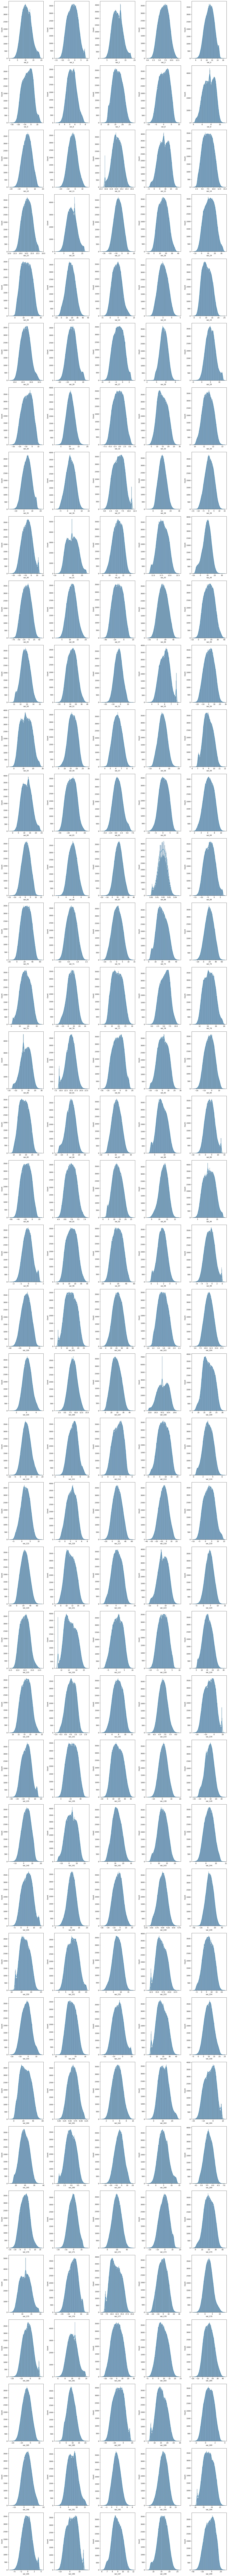

In [73]:
x=data.iloc[:,2:202]
plt.figure(figsize=(20,225))
z=1
for y in x:
    plt.subplot(40,5,z)
    sns.histplot(data=x[y],kde=True)
    z+=1
plt.tight_layout()
plt.show()   


- **Normal Distribution Observated**
   - 
The data distribution for most columns appears to follow a normal distribution based on the graph. This suggests that parametric statistical methods assuming normality may be applicable.

## Distribution of mean and std

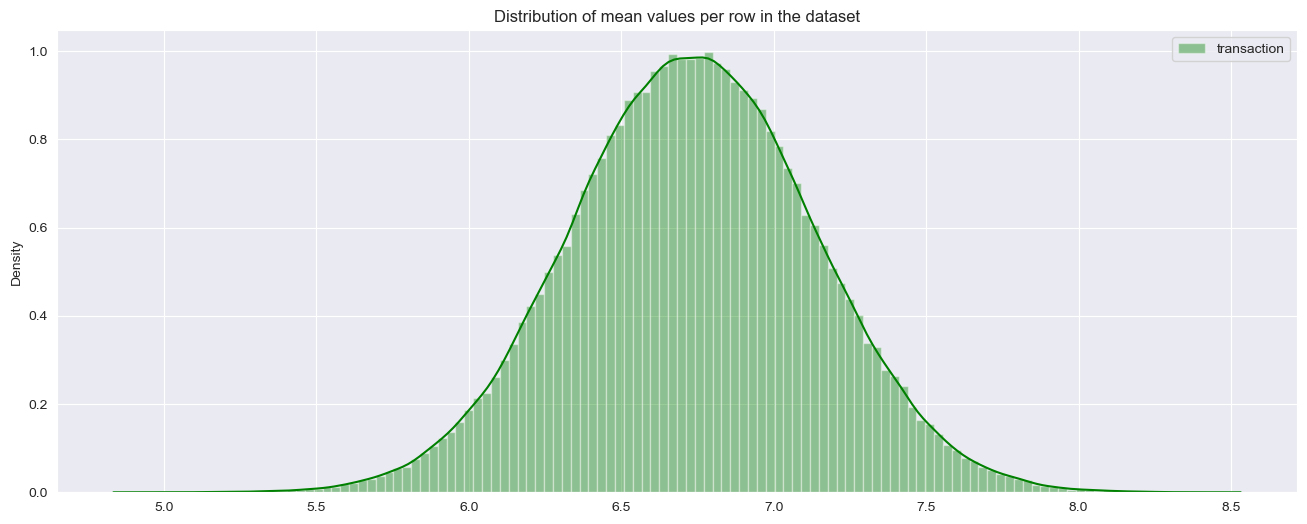

In [16]:

plt.figure(figsize=(16,6))
features = N_col.columns.values
sns.set_style('darkgrid')
plt.title("Distribution of mean values per row in the dataset")
sns.distplot(data[features].mean(axis=1),color="green", kde=True,bins=120, label='transaction')
plt.legend()
plt.show()

**Symmetric Distribution of Mean Values:**
 - The distribution of mean values per row follows a normal distribution, indicating that the data is symmetric.
 - The majority of the rows have a similar average value, with the peak of the distribution centered around the range of 6.5 to 7.0.
 - This suggests that most values in the dataset fall within this range, indicating a concentration of values around this central point.nt.

## Distribution of mean values per column in the dataset

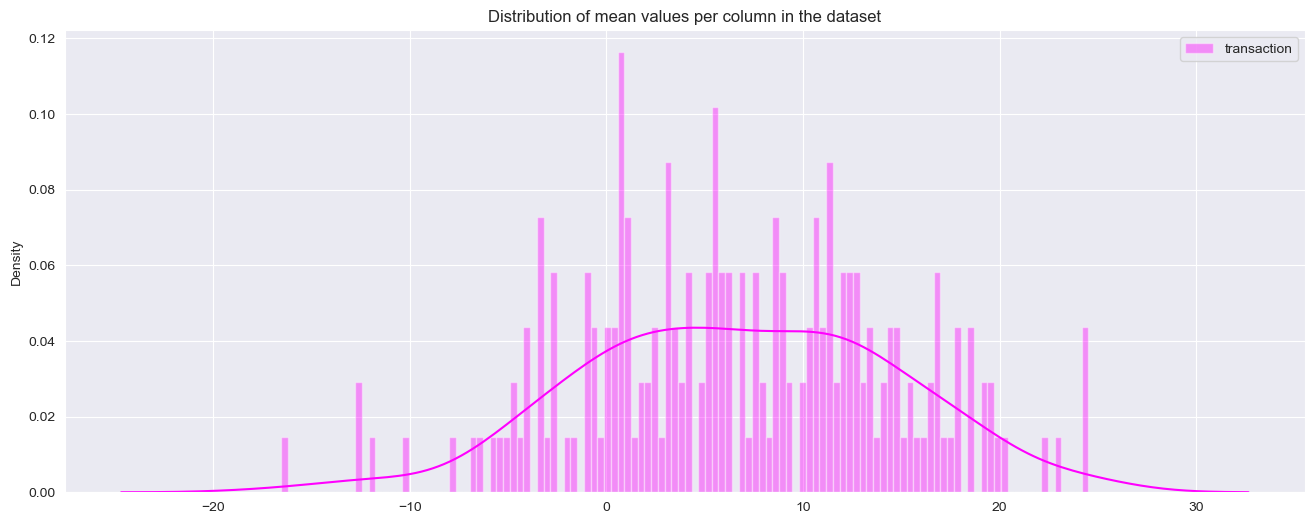

In [17]:
plt.figure(figsize=(16,6))
plt.title("Distribution of mean values per column in the dataset")
sns.distplot(data[features].mean(axis=0),color="magenta",kde=True,bins=120, label='transaction')
plt.legend()
plt.show()


- **Wide Range of Variance:**
  - The mean distribution across axis 0 shows a wide range of variance, ranging from -20 to 30.
  - The data appears to be skewed towards the left, which could be due to the data not being scaled.
  - The density plot reveals that columns with mean values close to 0 have a higher frequency, as indicated by the peak in the KDE line.
  - This suggests that there are many columns where the average value is close to 0, indicating a concentration of values around this point.


## Distribution of std values per row in the dataset

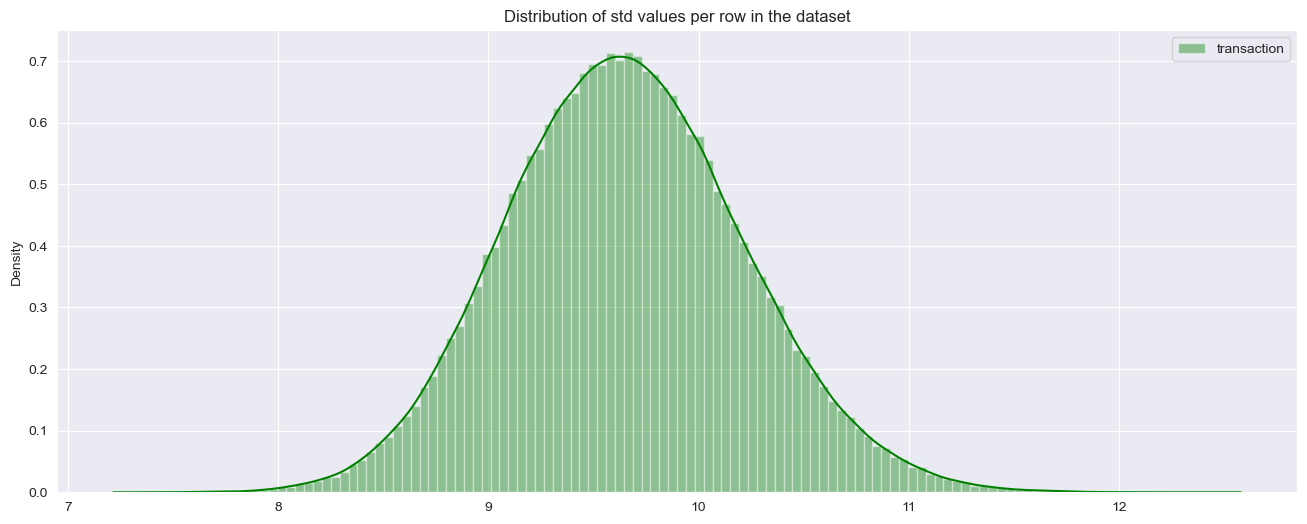

In [18]:
plt.figure(figsize=(16,6))
plt.title("Distribution of std values per row in the dataset")
sns.distplot(data[features].std(axis=1),color="green",kde=True,bins=120, label='transaction')
plt.legend()
plt.show()


- **Symmetric Distribution of Standard Deviation Values:**
  - The distribution of standard deviation values per row follows a normal distribution, indicating that the data is symmetric.
  - Most rows have a similar standard deviation value, with the peak of the distribution centered around the range of 9 to 10.
  - This suggests that most values in the dataset fall within this range, indicating a concentration of values around this central point.


## Distribution of std values per column in the dataset

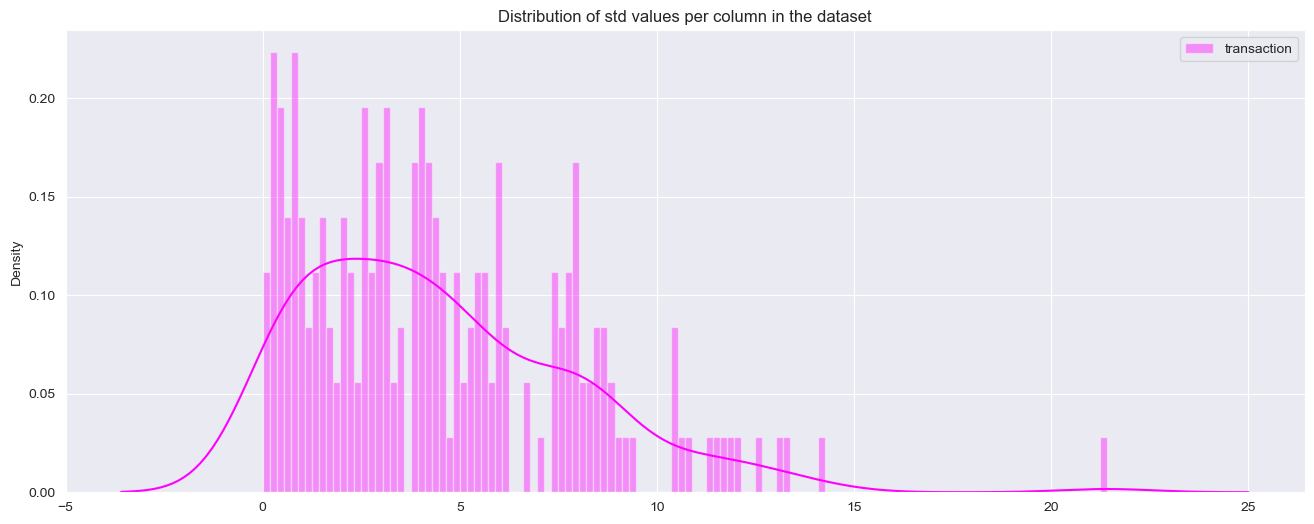

In [19]:
plt.figure(figsize=(16,6))
plt.title("Distribution of std values per column in the dataset")
sns.distplot(data[features].std(axis=0),color="magenta",kde=True,bins=120, label='transaction')
plt.legend()
plt.show()


- **Distribution of Standard Deviation Across Axis 0:**
  - The standard deviation distribution across axis 0 shows a wide range of variance, ranging from -5 to 25.
  - The data appears to be skewed towards the right, which could be due to the data not being scaled.
  - The density plot reveals that the frequency of columns with standard deviation values close to 0 is higher, as indicated by the peak in the KDE line.


## QQ-plot 

In [20]:
import statsmodels.api as sm

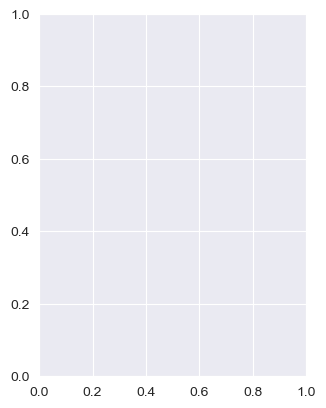

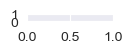

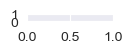

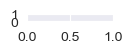

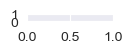

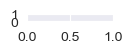

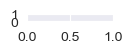

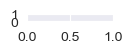

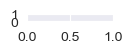

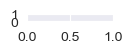

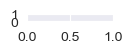

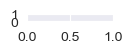

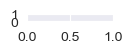

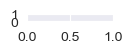

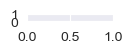

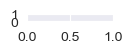

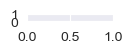

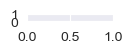

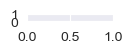

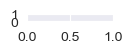

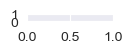

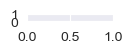

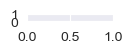

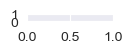

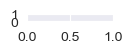

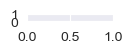

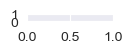

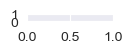

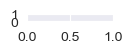

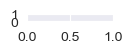

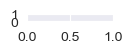

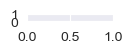

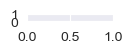

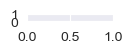

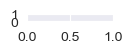

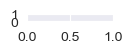

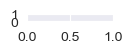

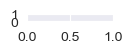

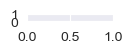

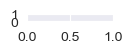

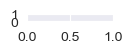

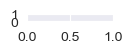

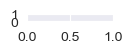

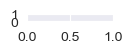

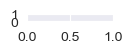

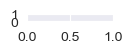

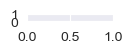

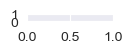

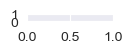

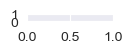

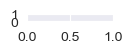

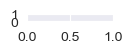

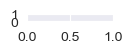

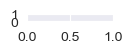

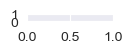

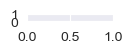

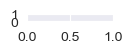

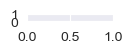

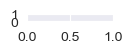

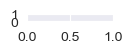

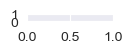

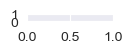

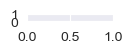

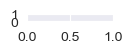

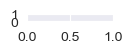

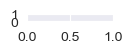

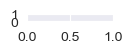

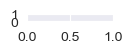

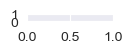

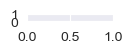

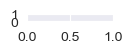

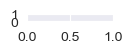

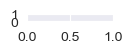

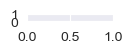

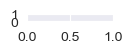

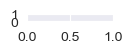

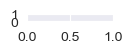

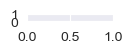

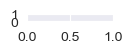

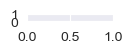

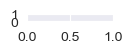

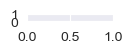

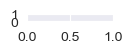

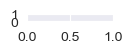

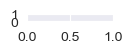

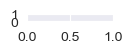

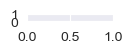

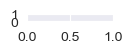

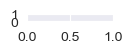

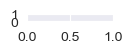

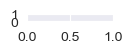

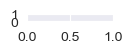

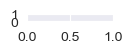

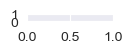

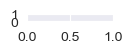

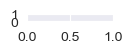

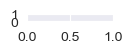

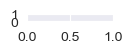

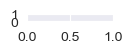

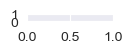

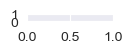

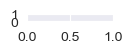

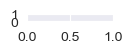

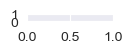

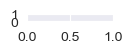

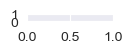

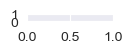

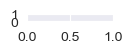

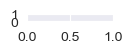

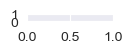

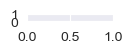

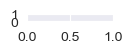

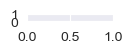

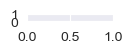

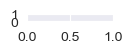

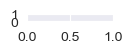

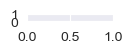

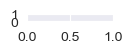

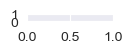

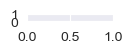

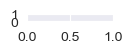

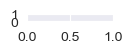

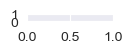

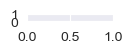

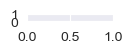

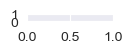

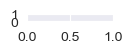

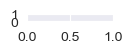

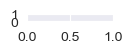

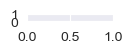

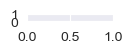

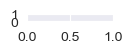

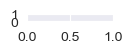

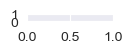

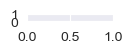

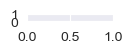

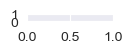

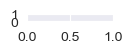

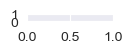

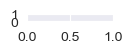

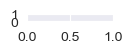

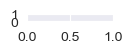

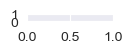

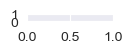

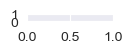

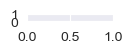

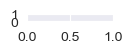

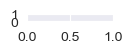

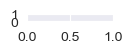

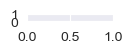

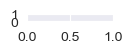

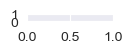

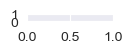

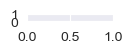

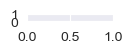

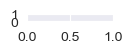

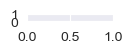

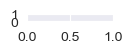

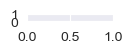

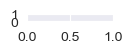

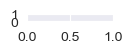

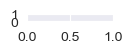

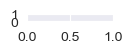

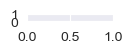

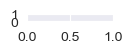

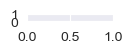

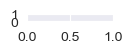

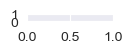

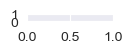

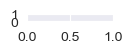

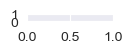

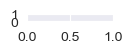

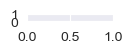

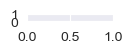

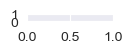

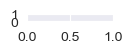

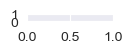

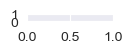

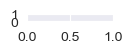

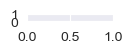

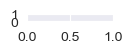

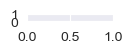

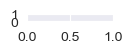

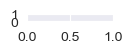

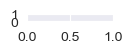

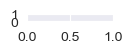

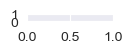

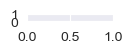

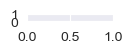

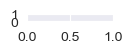

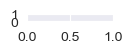

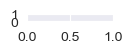

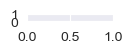

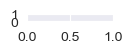

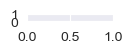

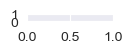

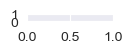

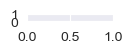

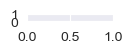

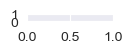

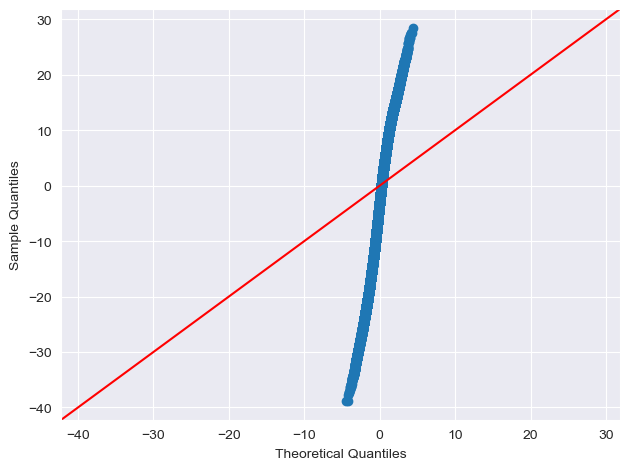

In [21]:
x=data.iloc[:,2:202]
plt.figure(figsize=(20,225))
z=1
for y in x:
    plt.subplot(40,5,z)
    sm.qqplot(data=x[y],line='45')
    z+=1
plt.tight_layout()
plt.show()   


outliers

**Q-Q plot:**
 - The Q-Q plot is used to assess if a dataset follows a normal distribution. The theoretical quantiles of the normal distribution are plotted on the x-axis, and the sample quantiles of the dataset are plotted on the y-axis.
 - from the above graphs we can see most of the line follows the theorical value of normal distribution ,some  points closely follow the red reference line except at the tails, suggesting that most of the sample data conforms to a normal distribution with some deviation at the extremes.

# Feature Engineering and Data Preprocessing

## outliers

### Interquartile range

In [22]:
outlier_columns_info.iloc[1:]

column_name  len_outliers  percentile
2         var_0           104      0.0520
3         var_1             6      0.0030
4         var_2            49      0.0245
5         var_3            22      0.0110
6         var_4            76      0.0380
..          ...           ...         ...
186     var_194             2      0.0010
187     var_195           132      0.0660
188     var_197            51      0.0255
189     var_198            94      0.0470
190     var_199            20      0.0100

[189 rows x 3 columns]

In [23]:
N_col.drop(columns='target',inplace=True)

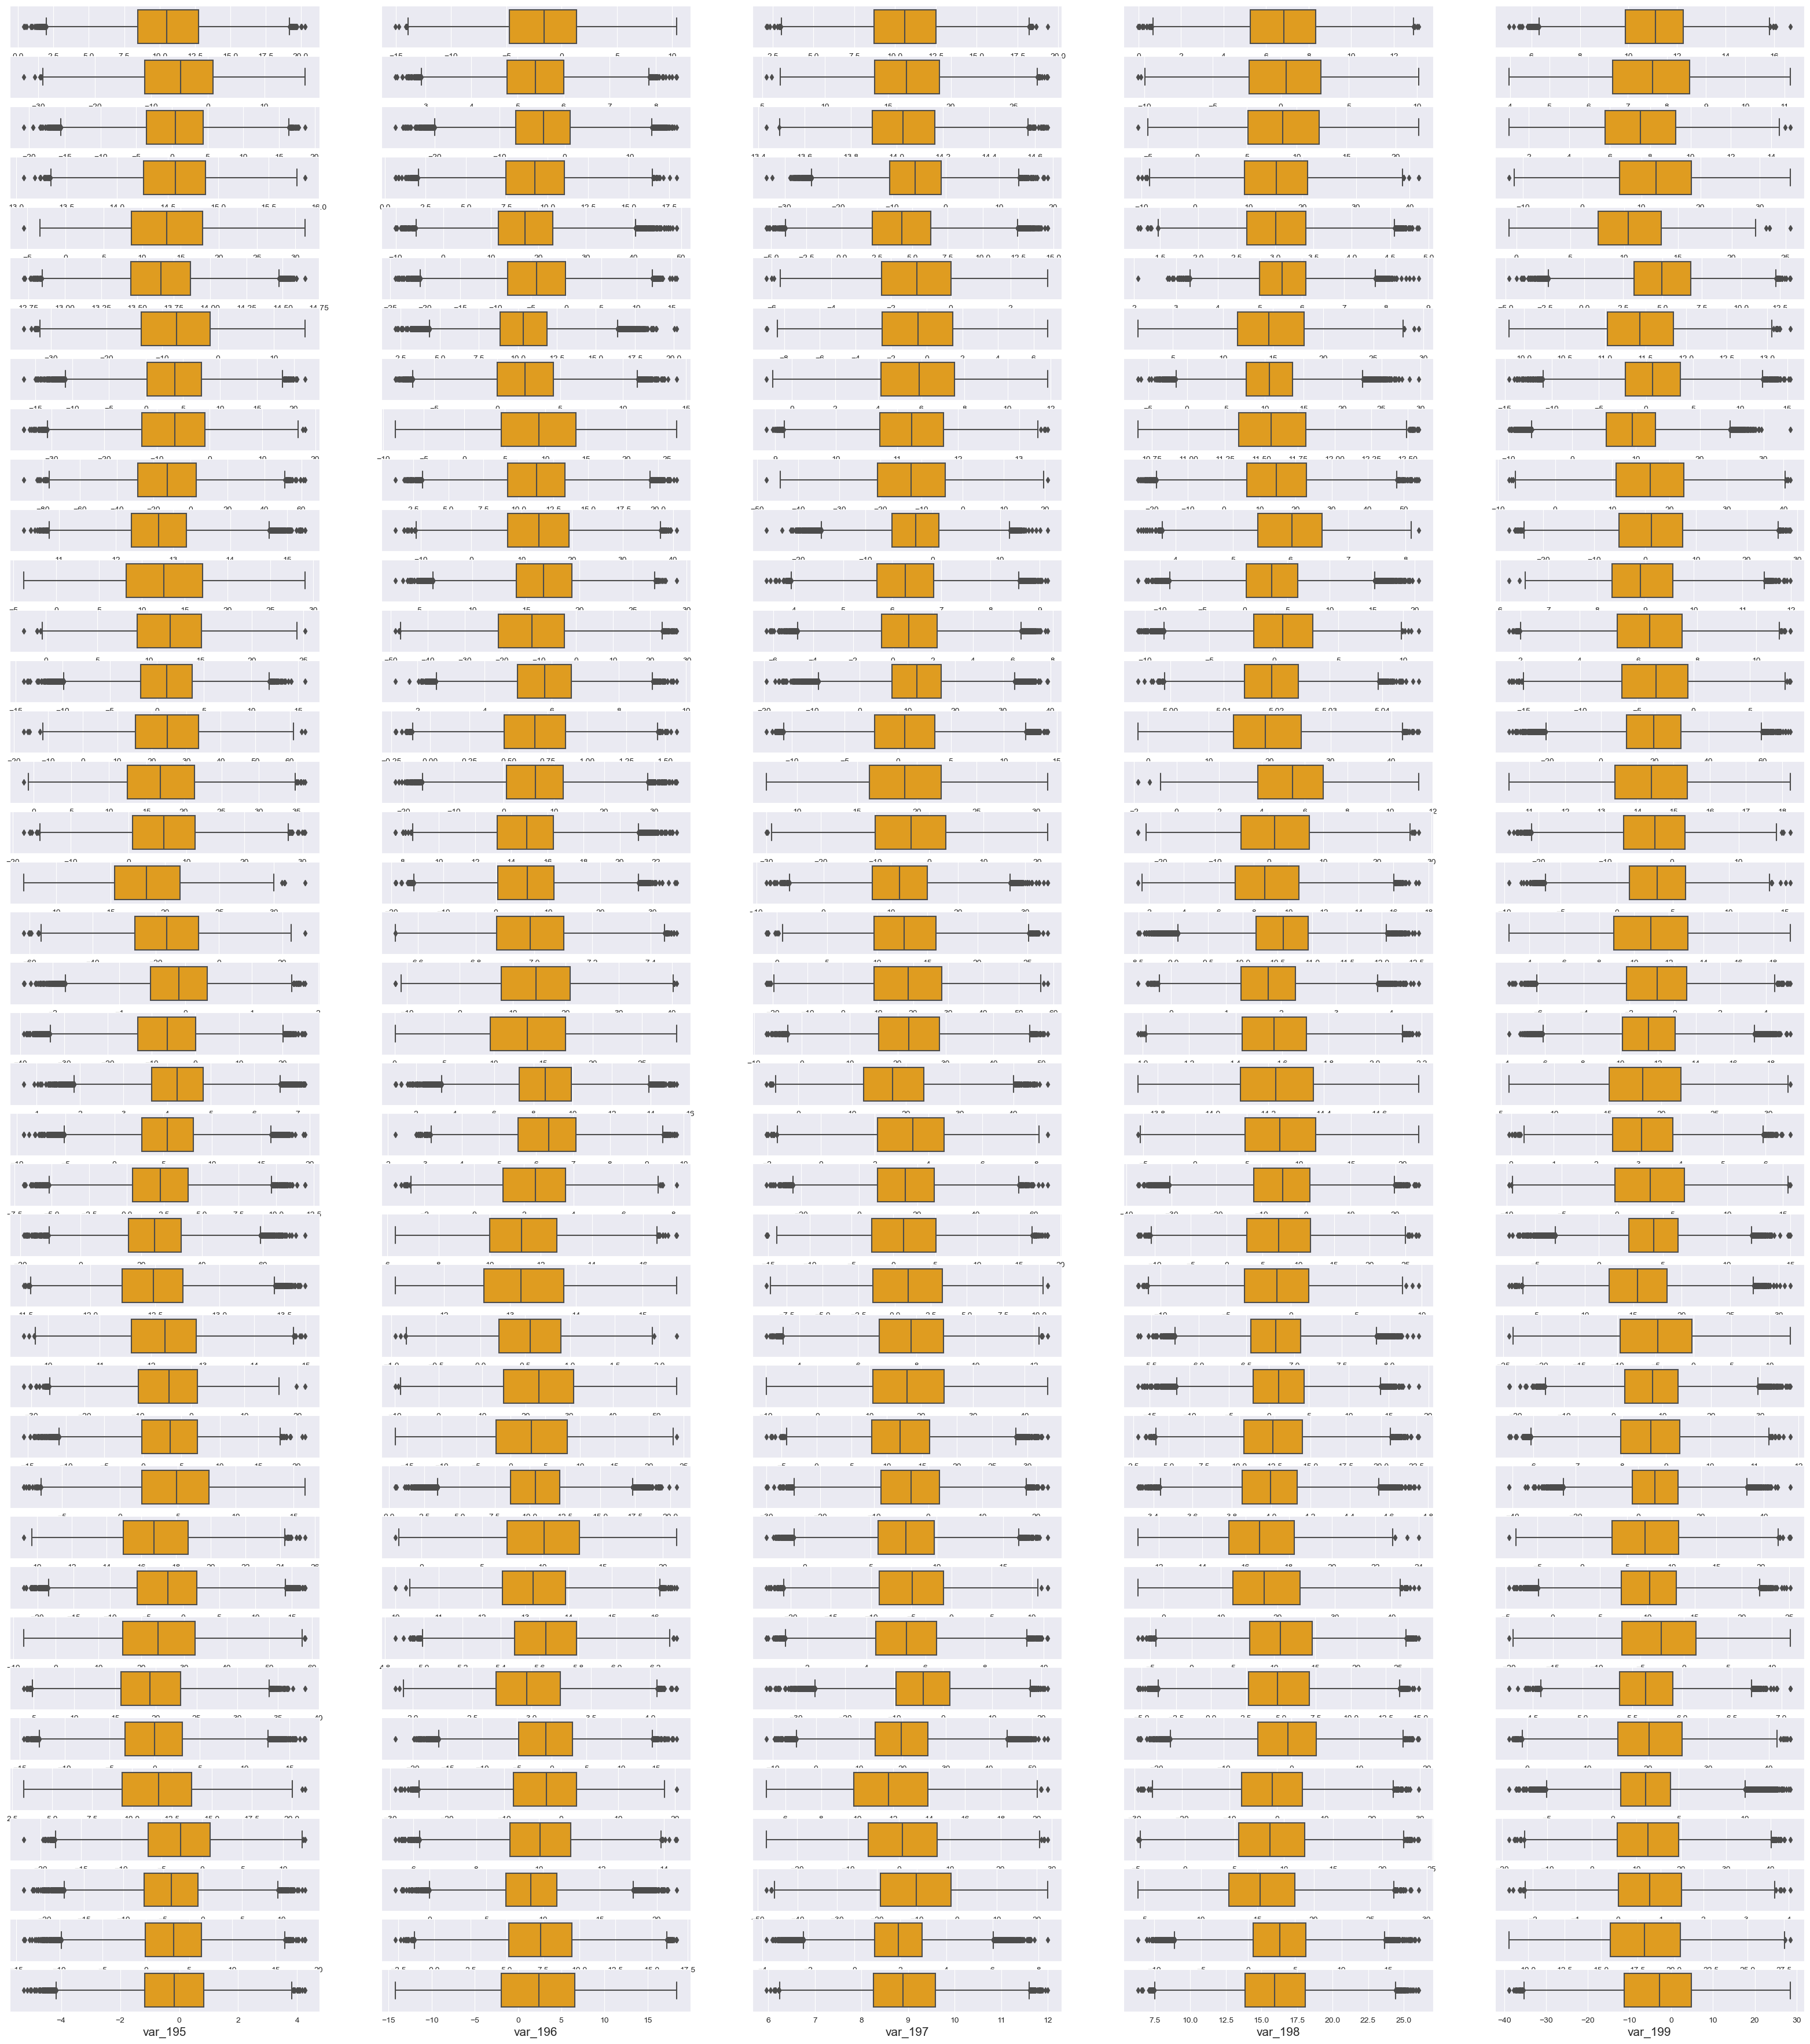

In [24]:

plt.figure(figsize=(40,45),facecolor='white') 
plotno = 1 # Counter
for column in N_col.columns:
    # Itreting the feature
    plt.subplot(40,5,plotno) 
    sns.boxplot(x=N_col[column],color='orange')
    plt.xlabel(column,fontsize=15) 
    plotno+=1

plt.show() 

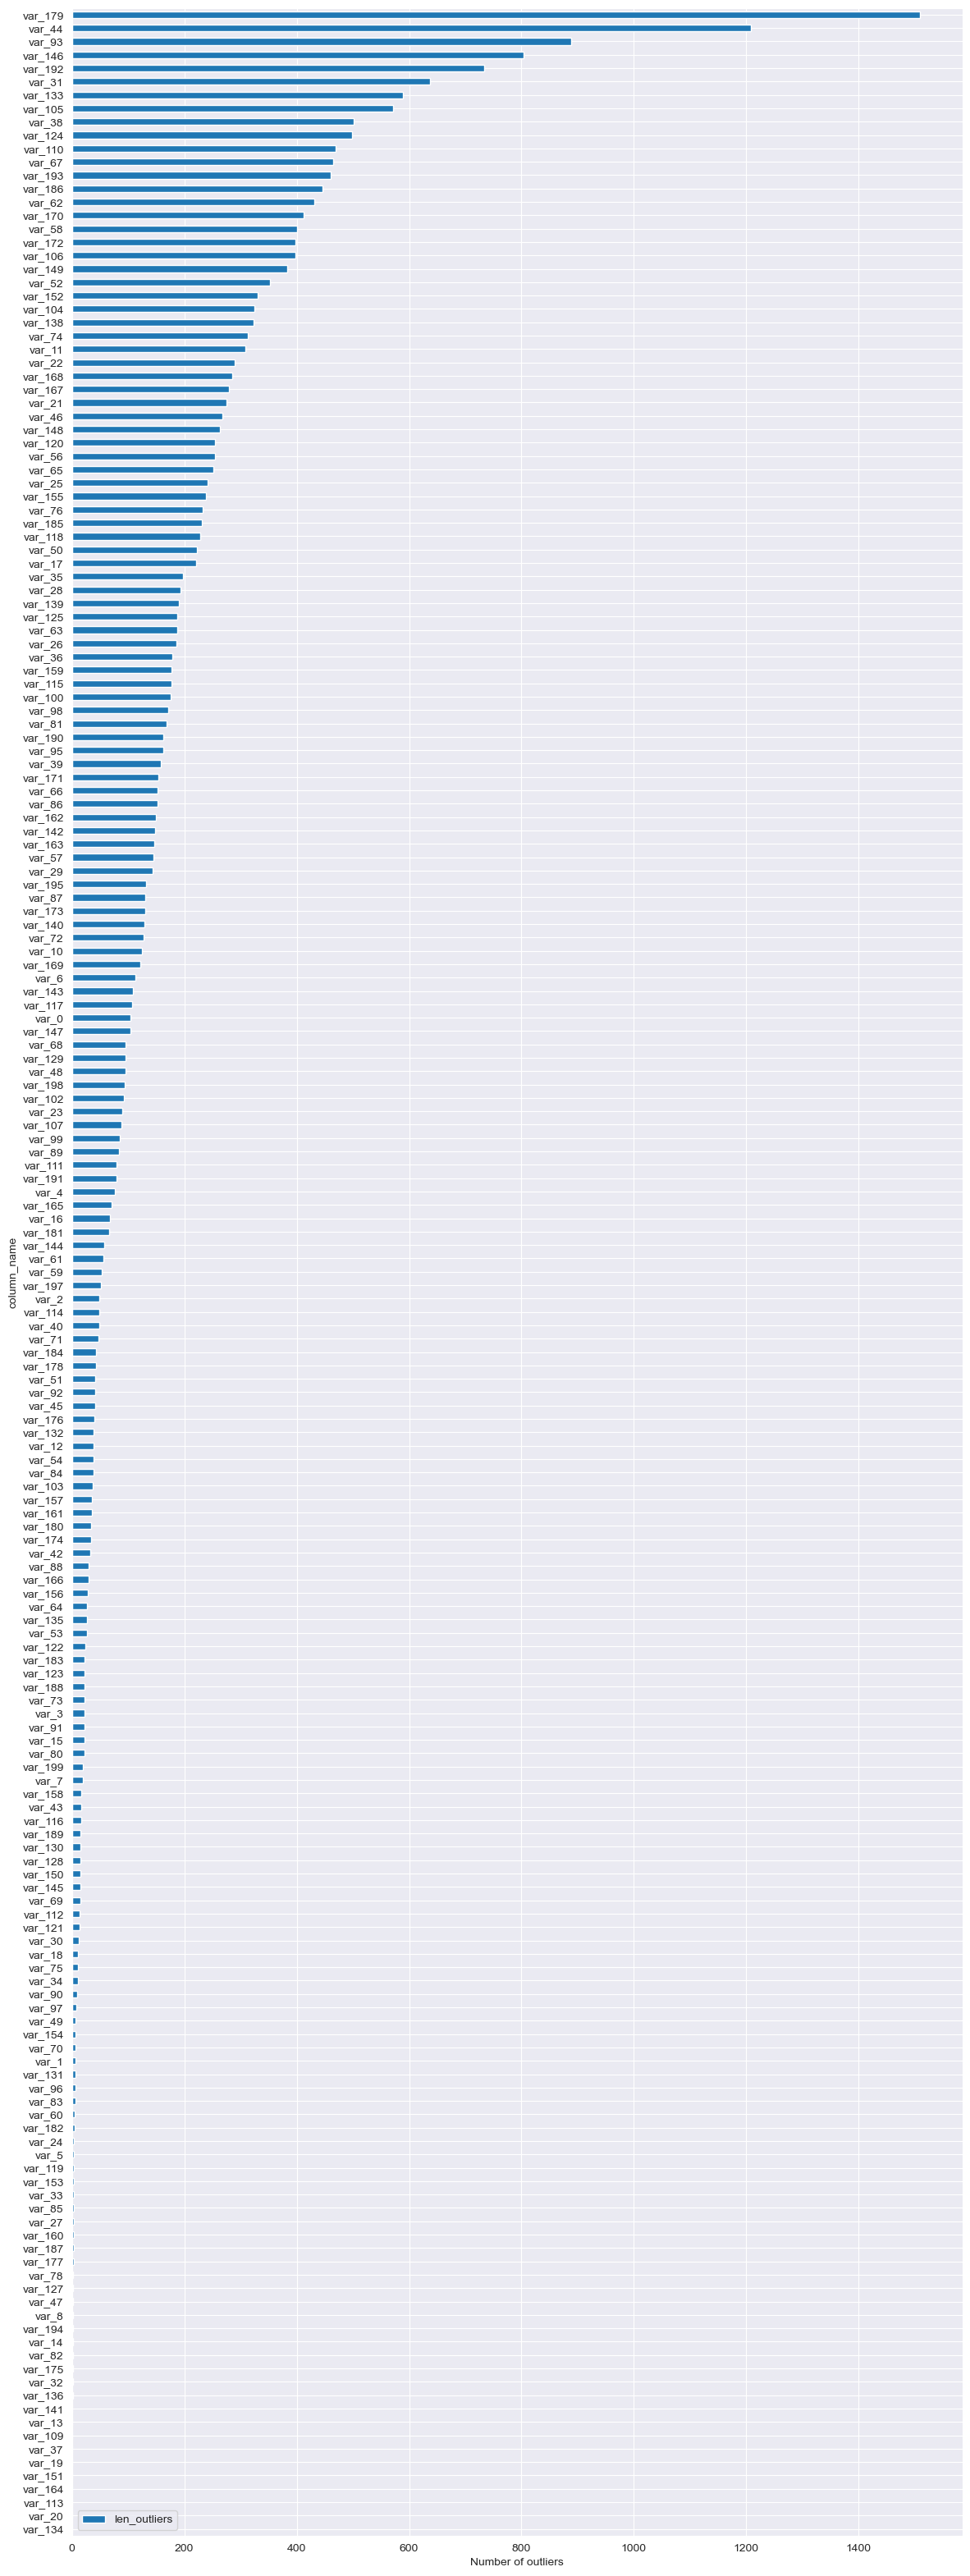

In [25]:
outlier_columns_info.iloc[1:].sort_values('percentile').plot(kind='barh', figsize=(14, 40), x='column_name', y='len_outliers')
plt.xlabel('Number of outliers')
plt.show()

In [26]:
print('Total number of outliers in training set: {} ({:.2f}%)'.format(sum(outlier_columns_info['len_outliers'].values), (sum(outlier_columns_info['len_outliers'].values) / data.shape[0]) * 100))

Total number of outliers in training set: 46634 (23.32%)


tho the each columns contains only less than 1% off outlier,but if we drop the lost data add upto 12% hence try ing other method

### Chauvenet's criterion

Text(0.5, 0, 'Number of outliers')

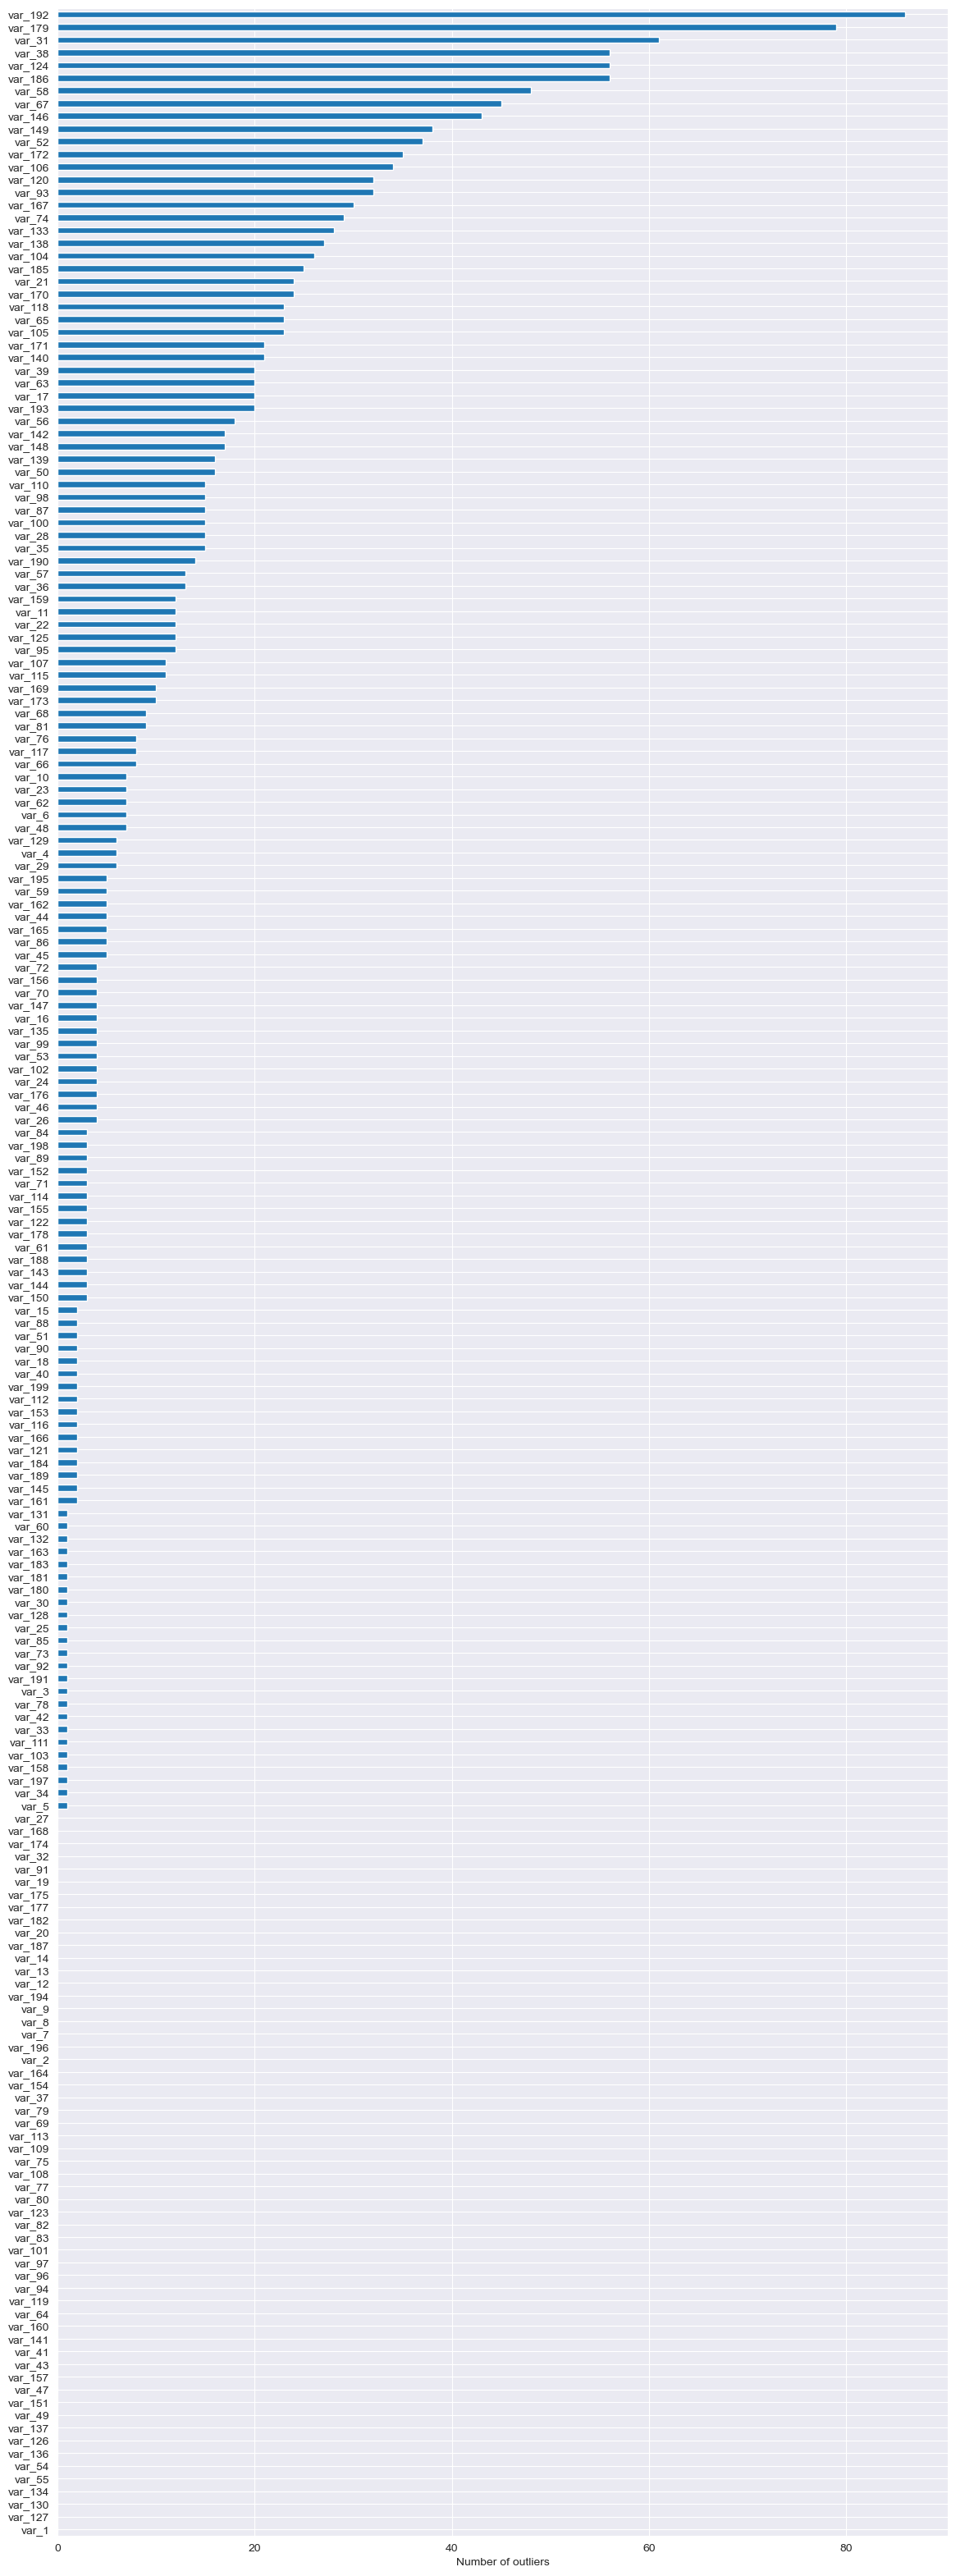

In [27]:
train_outliers = dict()
for col in N_col.iloc[:,1:]:
    train_outliers[col] = data[chauvenet(data[col].values)].shape[0]
train_outliers = pd.Series(train_outliers)

train_outliers.sort_values().plot(figsize=(14, 40), kind='barh').set_xlabel('Number of outliers')

In [28]:
print('Total number of outliers in training set: {} ({:.2f}%)'.format(sum(train_outliers.values), (sum(train_outliers.values) / data.shape[0]) * 100))

Total number of outliers in training set: 1738 (0.87%)


In [29]:
for col in N_col.columns:
    outliers = data[chauvenet(data[col].values)]
    data = data[~data.index.isin(outliers.index)]

## Train Test Split

In [30]:
x=data.drop(columns=['target','ID_code'])
y=data['target']

In [31]:
x.columns

Index(['var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7',
       'var_8', 'var_9',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=200)

In [32]:
y.value_counts()

target
0    178356
1     19908
Name: count, dtype: int64

In [33]:
data.shape
200000-198264

1736

In [34]:
from sklearn.model_selection import train_test_split
trainx,testx,trainy,testy=train_test_split(x,y,test_size=0.25,random_state=47)
print(trainx.shape  ,  trainy.shape)
print(testx.shape  ,   testy.shape)

(148698, 200) (148698,)
(49566, 200) (49566,)


In [35]:
data['target'].value_counts()

target
0    178356
1     19908
Name: count, dtype: int64

In [36]:
x.columns

Index(['var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7',
       'var_8', 'var_9',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=200)

## Feature selection

## variance method 

In [37]:

from sklearn.feature_selection import VarianceThreshold
var=VarianceThreshold()
var.fit(x)

VarianceThreshold()

In [38]:
var.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [39]:
var.get_support().sum()

200

In [40]:
trainx.shape

(148698, 200)

- There are no columns with variance below the threshold set by VarianceThreshold. Since all columns have high variance, using VarianceThreshold for feature selection may not be effective.

## correlation

In [41]:
col_corr=correlation(x,90,False)
col_corr

set()

In [42]:
corr = x.corr()
np.fill_diagonal(corr.values,np.nan)
corr.max().max(),corr.min().min()

(0.009676303707076603, -0.009839944915003394)

- There is no strong correlation between any pair of variables in the dataset

## pca method 

### StandardScaler

In [43]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
trainx_scal=scaler.fit_transform(trainx)
testx_scal=scaler.transform(testx)

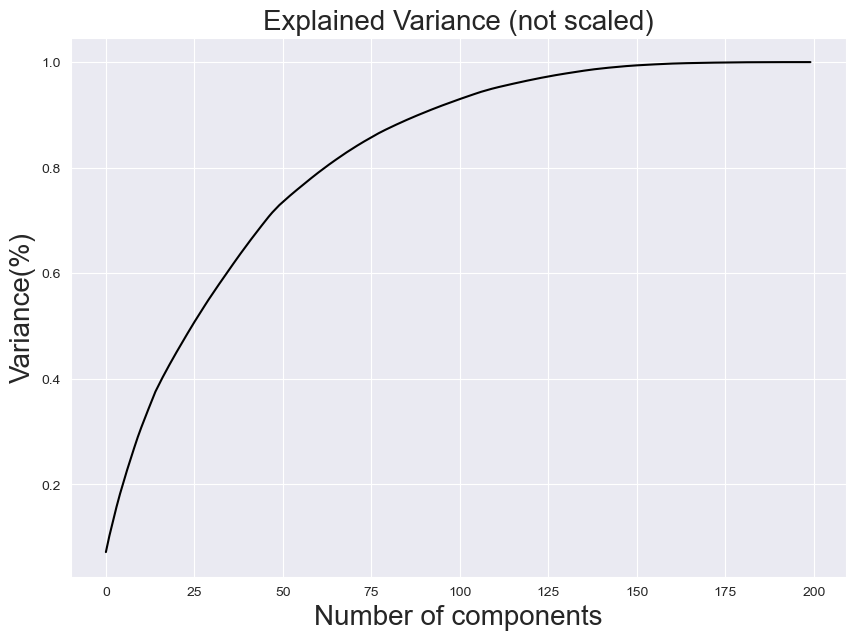

In [44]:
from sklearn.decomposition import PCA
pca = PCA()
principlecomponent = pca.fit_transform(trainx)  
plt.figure(figsize=(10,7))
sns.set_style('darkgrid')
plt.plot(np.cumsum(pca.explained_variance_ratio_),color ='k')
plt.xlabel('Number of components',fontsize=20)
plt.ylabel('Variance(%)',fontsize=20)
plt.title('Explained Variance (not scaled)',fontsize=20)
plt.show()


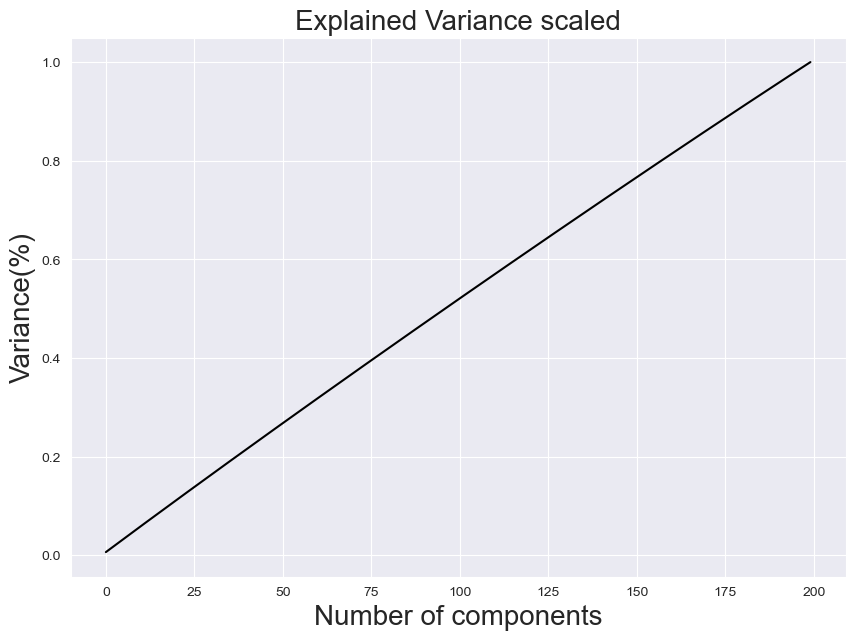

In [45]:
from sklearn.decomposition import PCA
pca = PCA()
principlecomponent = pca.fit_transform(trainx_scal)  
plt.figure(figsize=(10,7))
sns.set_style('darkgrid')
plt.plot(np.cumsum(pca.explained_variance_ratio_),color ='k')
plt.xlabel('Number of components',fontsize=20)
plt.ylabel('Variance(%)',fontsize=20)
plt.title('Explained Variance scaled',fontsize=20)
plt.show()


- From the PCA graph, it's evident that around 175 columns contribute to 90% of the variance in the dataset. This implies that a significant amount of information is captured by these 175 columns. Utilizing only these columns for computations can lead to faster processing without losing much information, making the analysis more efficient.

In [46]:
from sklearn.decomposition import PCA
pca = PCA()
pca = PCA(n_components= 175)
pca_data = pca.fit_transform(trainx_scal)
train_pca = pd.DataFrame(pca_data)
pca_data1 = pca.transform(testx_scal)
test_pca = pd.DataFrame(pca_data1)

In [47]:
train_pca.shape #trainx data

(148698, 175)

In [48]:
test_pca.shape #testx data

(49566, 175)

## validation split

In [49]:
from sklearn.model_selection import train_test_split
train_x_pca,val_x_pca,train_y_pca,val_y_pca=train_test_split(train_pca,trainy,test_size=0.30,random_state=47)
print(train_x_pca.shape  ,  train_y_pca.shape)
print(val_x_pca.shape  ,   val_y_pca.shape)

(104088, 175) (104088,)
(44610, 175) (44610,)


## SMOTE

In [50]:
from imblearn.over_sampling import SMOTE
smt=SMOTE(random_state=47)
train_x_smt_pca,train_y_smt=smt.fit_resample(train_x_pca,train_y_pca)
print (trainy.value_counts())
print(train_y_smt.value_counts())

target
0    133780
1     14918
Name: count, dtype: int64
target
0    93695
1    93695
Name: count, dtype: int64


# Machine Learning Implementation

In [51]:
model_metrics = {
    'model': [],
    'roc_auc_score':[],
    'f1_score': [],
    'accuracy': [],    
    'precision': [],
    'recall': [],
    'confusion matrix':[]
    
}


## Logistic Regression

In [201]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score,confusion_matrix,roc_auc_score,roc_curve
model=LogisticRegression(random_state=45)

In [202]:
# testing data
model.fit(train_x_smt_pca,train_y_smt)
ypred_lr=model.predict(test_pca)


print('f1_score        ',f1_score(ypred_lr,testy))
print('accuracy_score  ',accuracy_score(ypred_lr,testy))
print('precision_score ',precision_score(ypred_lr,testy))
print('recall_score    ',recall_score(ypred_lr,testy))
print("ROC-AUC Score   ", roc_auc_score(ypred_lr,testy))
print('classification_report test_pca')
print(classification_report(ypred_lr,testy))
print('confusion_matrix')
print(confusion_matrix(ypred_lr,testy))

f1_score         0.41803778184034124
accuracy_score   0.7880603639591656
precision_score  0.7561122244488978
recall_score     0.2888752775438328
ROC-AUC Score    0.6277686893129382
classification_report test_pca
              precision    recall  f1-score   support

           0       0.79      0.97      0.87     36505
           1       0.76      0.29      0.42     13061

    accuracy                           0.79     49566
   macro avg       0.77      0.63      0.64     49566
weighted avg       0.78      0.79      0.75     49566

confusion_matrix
[[35288  1217]
 [ 9288  3773]]


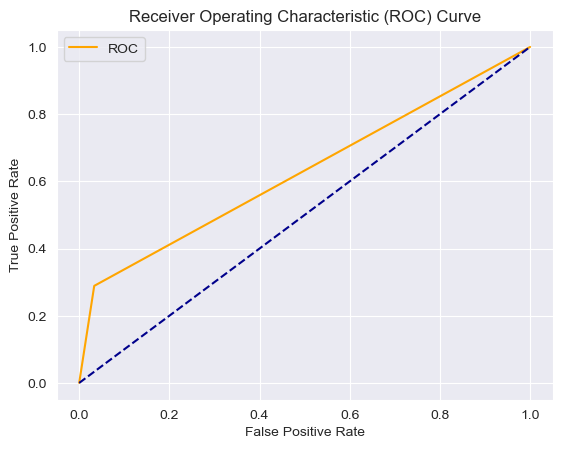

In [203]:
fpr, tpr, thresholds = roc_curve(ypred_lr,testy)
sns.set_style('darkgrid')
plot_roc_curve(fpr,tpr)

In [204]:
# training data
model.fit(train_x_smt_pca,train_y_smt)
ypred=model.predict(train_x_smt_pca)


print('f1_score        ',f1_score(ypred,train_y_smt))
print('accuracy_score  ',accuracy_score(ypred,train_y_smt))
print('precision_score ',precision_score(ypred,train_y_smt))
print('recall_score    ',recall_score(ypred,train_y_smt))
print("ROC-AUC Score   ", roc_auc_score(ypred,train_y_smt))
print('classification_report test_pca')
print(classification_report(ypred,train_y_smt))
print('confusion_matrix')
print(confusion_matrix(ypred,train_y_smt))




f1_score         0.802576897689769
accuracy_score   0.8004856182293613
precision_score  0.8110784993863066
recall_score     0.7942516722408027
ROC-AUC Score    0.8006205477112855
classification_report test_pca
              precision    recall  f1-score   support

           0       0.79      0.81      0.80     91710
           1       0.81      0.79      0.80     95680

    accuracy                           0.80    187390
   macro avg       0.80      0.80      0.80    187390
weighted avg       0.80      0.80      0.80    187390

confusion_matrix
[[74009 17701]
 [19686 75994]]


In [205]:
model_metrics['model'].append('standard scaled Logistic Regression ')
model_metrics['accuracy'].append(accuracy_score(ypred_lr, testy).round(2)*100)
model_metrics['f1_score'].append(f1_score(ypred_lr, testy).round(2)*100)
model_metrics['precision'].append(precision_score(ypred_lr, testy).round(2)*100)
model_metrics['recall'].append(recall_score(ypred_lr, testy).round(2)*100)
model_metrics['confusion matrix'].append(confusion_matrix(ypred_lr,testy).tolist())
model_metrics['roc_auc_score'].append(roc_auc_score(ypred_lr,testy).round(2)*100)

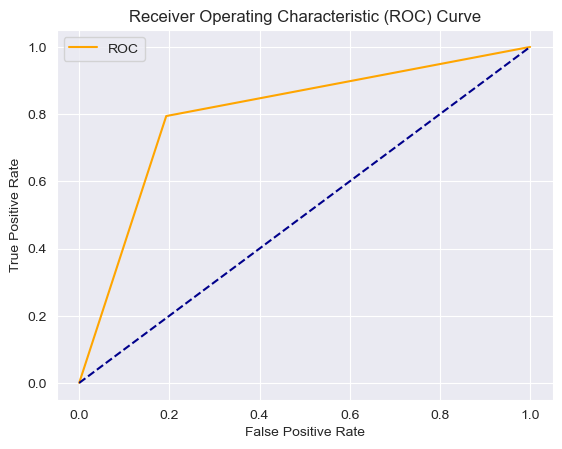

In [206]:
fpr, tpr, thresholds = roc_curve(ypred,train_y_smt)
plot_roc_curve(fpr,tpr)

#### Hyperparameter tuned Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression
log_reg_hpt=LogisticRegression()
grid={
    'C': np.arange(100,1500,20), 
    'penalty': ['l1', 'l2','elasticnet'],
    'solver': ['liblinear', 'saga'],
'max_iter':list(np.arange(15)*100)}
from sklearn.model_selection import RandomizedSearchCV
log_rcv=RandomizedSearchCV(estimator=log_reg_hpt,param_distributions=grid,cv=10,scoring='f1',n_jobs=-1,random_state=47)
log_rcv.fit(val_x_pca, val_y_pca)
print(log_rcv.best_params_)


{'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 600, 'C': 520}


In [60]:
print(log_rcv.best_score_)

0.40758907272545597


In [207]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score,confusion_matrix
model_hp = LogisticRegression(C=260, max_iter=900, penalty='l1', solver='saga',random_state=45)


In [208]:
# testing data
model_hp.fit(train_x_smt_pca,train_y_smt)
ypred_lr_hp=model_hp.predict(test_pca)


print('f1_score        ',f1_score(ypred_lr_hp,testy))
print('accuracy_score  ',accuracy_score(ypred_lr_hp,testy))
print('precision_score ',precision_score(ypred_lr_hp,testy))
print('recall_score    ',recall_score(ypred_lr_hp,testy))
print("ROC-AUC Score   ", roc_auc_score(ypred_lr_hp,testy))
print('classification_report test_pca')
print(classification_report(ypred_lr_hp,testy))
print('confusion_matrix')
print(confusion_matrix(ypred_lr_hp,testy))




f1_score         0.4179501385041552
accuracy_score   0.7880401888391236
precision_score  0.7559118236472946
recall_score     0.2888208269525268
ROC-AUC Score    0.6277282242470956
classification_report test_pca
              precision    recall  f1-score   support

           0       0.79      0.97      0.87     36506
           1       0.76      0.29      0.42     13060

    accuracy                           0.79     49566
   macro avg       0.77      0.63      0.64     49566
weighted avg       0.78      0.79      0.75     49566

confusion_matrix
[[35288  1218]
 [ 9288  3772]]


In [209]:
model_metrics['model'].append('Standard scaled Logistic Regression hyperparameters tuned')
model_metrics['accuracy'].append(accuracy_score(ypred_lr_hp, testy).round(2)*100)
model_metrics['f1_score'].append(f1_score(ypred_lr_hp, testy).round(2)*100)
model_metrics['precision'].append(precision_score(ypred_lr_hp, testy).round(2)*100)
model_metrics['recall'].append(recall_score(ypred_lr_hp, testy).round(2)*100)
model_metrics['confusion matrix'].append(confusion_matrix(ypred_lr_hp,testy).tolist())
model_metrics['roc_auc_score'].append(roc_auc_score(ypred_lr_hp,testy).round(2)*100)

- Comparing the testing data and hyperparameter tuning scenarios, we observe similar performance metrics across both scenarios. This suggests that hyperparameter tuning did not significantly improve model performance in this case.

- The training data scenario shows higher performance metrics compared to both testing and hyperparameter tuning scenarios, indicating potential overfitting of the model to the training data.

## ANN

In [210]:
from sklearn.neural_network import MLPClassifier
ann_smote = MLPClassifier(random_state=47)
ann_smote.fit(train_x_smt_pca,train_y_smt)
ypred_ann=ann_smote.predict(test_pca)

print('f1_score        ',f1_score(ypred_ann,testy))
print('accuracy_score  ',accuracy_score(ypred_ann,testy))
print('precision_score ',precision_score(ypred_ann,testy))
print('recall_score    ',recall_score(ypred_ann,testy))
print('classification_report')
print(classification_report(ypred_ann,testy))
print('confusion_matrix')
print(confusion_matrix(ypred_ann,testy))


f1_score         0.31073348361366393
accuracy_score   0.8396077956663842
precision_score  0.3591182364729459
recall_score     0.27383863080684595
classification_report
              precision    recall  f1-score   support

           0       0.89      0.93      0.91     43022
           1       0.36      0.27      0.31      6544

    accuracy                           0.84     49566
   macro avg       0.63      0.60      0.61     49566
weighted avg       0.82      0.84      0.83     49566

confusion_matrix
[[39824  3198]
 [ 4752  1792]]


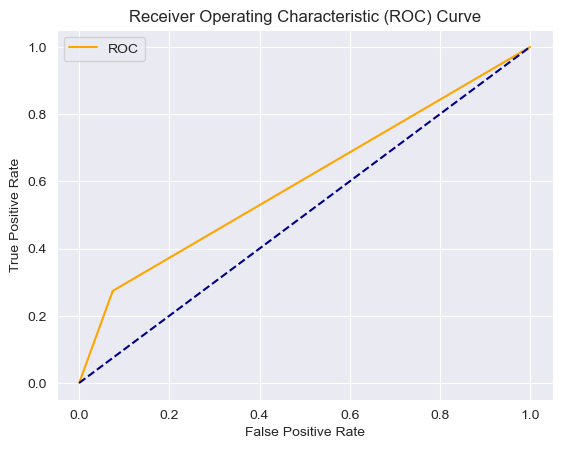

In [211]:
fpr, tpr, thresholds = roc_curve(ypred_ann,testy)
plot_roc_curve(fpr,tpr)

In [212]:
model_metrics['model'].append('standard scaled ANN ')
model_metrics['accuracy'].append(accuracy_score(ypred_ann, testy).round(2)*100)
model_metrics['f1_score'].append(f1_score(ypred_ann, testy).round(2)*100)
model_metrics['precision'].append(precision_score(ypred_ann, testy).round(2)*100)
model_metrics['recall'].append(recall_score(ypred_ann, testy).round(2)*100)
model_metrics['confusion matrix'].append(confusion_matrix(ypred_ann,testy).tolist())
model_metrics['roc_auc_score'].append(roc_auc_score(ypred_ann,testy).round(2)*100)

In [213]:
#traing data
ypred_ann = ann_smote.predict(train_x_smt_pca)


print('f1_score        ',f1_score(ypred_ann,train_y_smt))
print('accuracy_score  ',accuracy_score(ypred_ann,train_y_smt))
print('precision_score ',precision_score(ypred_ann,train_y_smt))
print('recall_score    ',recall_score(ypred_ann,train_y_smt))
print('classification_report')
print(classification_report(ypred_ann,train_y_smt))
print('confusion_matrix')
print(confusion_matrix(ypred_ann,train_y_smt))



f1_score         0.9863319920802197
accuracy_score   0.9862959602967074
precision_score  0.9889321735418112
recall_score     0.9837454479822485
classification_report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     93201
           1       0.99      0.98      0.99     94189

    accuracy                           0.99    187390
   macro avg       0.99      0.99      0.99    187390
weighted avg       0.99      0.99      0.99    187390

confusion_matrix
[[92164  1037]
 [ 1531 92658]]


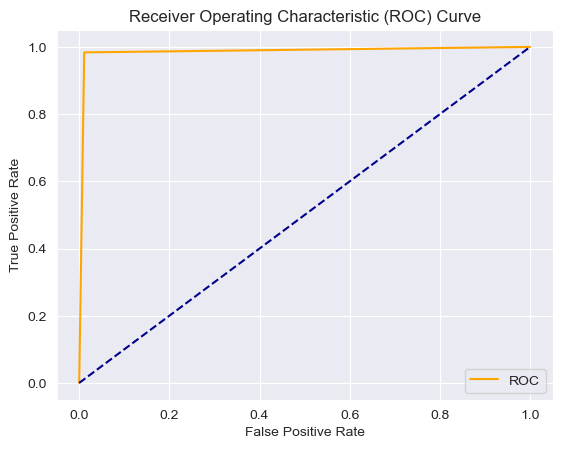

In [214]:
fpr, tpr, thresholds = roc_curve(ypred_ann,train_y_smt)
plot_roc_curve(fpr,tpr)

### Hyperparameter tuned ANN

In [53]:
from sklearn.model_selection import RandomizedSearchCV
model=MLPClassifier(random_state=47)
param_dist = {
    'hidden_layer_sizes': [(50,), (100,50), (150,50), (200,)],  
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'], 
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': list(np.arange(15)*100)  
}

random_ann=RandomizedSearchCV(n_iter=10,param_distributions=param_dist,estimator=model,cv=5)
random_ann.fit(val_x_pca, val_y_pca)

RandomizedSearchCV(cv=5, estimator=MLPClassifier(random_state=47),
                   param_distributions={'activation': ['relu', 'tanh'],
                                        'alpha': [0.0001, 0.001, 0.01],
                                        'hidden_layer_sizes': [(50,), (100, 50),
                                                               (150, 50),
                                                               (200,)],
                                        'learning_rate': ['constant',
                                                          'adaptive'],
                                        'max_iter': [0, 100, 200, 300, 400, 500,
                                                     600, 700, 800, 900, 1000,
                                                     1100, 1200, 1300, 1400],
                                        'solver': ['adam', 'sgd']})

In [54]:
print(random_ann.best_params_)

{'solver': 'adam', 'max_iter': 1200, 'learning_rate': 'adaptive', 'hidden_layer_sizes': (200,), 'alpha': 0.001, 'activation': 'tanh'}


In [215]:
from sklearn.neural_network import MLPClassifier
ann_smote = MLPClassifier(random_state=47,solver='adam',max_iter=1200,learning_rate='adaptive',hidden_layer_sizes=(200,),alpha=0.001,activation='tanh')
ann_smote.fit(train_x_smt_pca,train_y_smt)
ypred_ann_hp=ann_smote.predict(test_pca)

print('f1_score        ',f1_score(ypred_ann_hp,testy))
print('accuracy_score  ',accuracy_score(ypred_ann_hp,testy))
print('precision_score ',precision_score(ypred_ann_hp,testy))
print('recall_score    ',recall_score(ypred_ann_hp,testy))
print("ROC-AUC Score   ", roc_auc_score(ypred_ann_hp,testy))
print('classification_report')
print(classification_report(ypred_ann_hp,testy))
print('confusion_matrix')
print(confusion_matrix(ypred_ann_hp,testy))


f1_score         0.35495543200070606
accuracy_score   0.8525400476132833
precision_score  0.4030060120240481
recall_score     0.31714240656047943
ROC-AUC Score    0.624111978294699
classification_report
              precision    recall  f1-score   support

           0       0.90      0.93      0.92     43225
           1       0.40      0.32      0.35      6341

    accuracy                           0.85     49566
   macro avg       0.65      0.62      0.64     49566
weighted avg       0.84      0.85      0.84     49566

confusion_matrix
[[40246  2979]
 [ 4330  2011]]


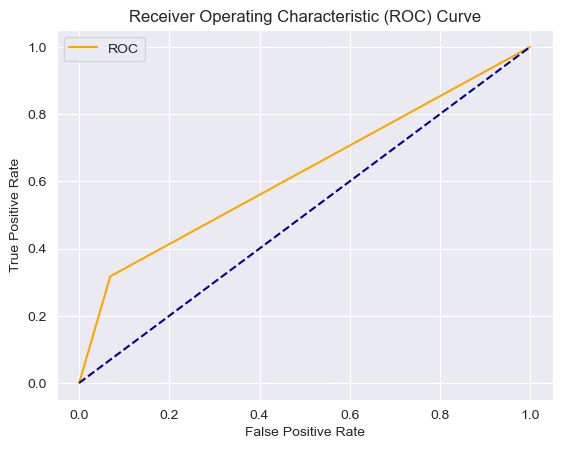

In [216]:
fpr, tpr, thresholds = roc_curve(ypred_ann_hp,testy)
plot_roc_curve(fpr,tpr)

In [217]:
model_metrics['model'].append('standard scaled ANN hyperparameters tuned')
model_metrics['accuracy'].append(accuracy_score(ypred_ann_hp, testy).round(2)*100)
model_metrics['f1_score'].append(f1_score(ypred_ann_hp, testy).round(2)*100)
model_metrics['precision'].append(precision_score(ypred_ann_hp, testy).round(2)*100)
model_metrics['recall'].append(recall_score(ypred_ann_hp, testy).round(2)*100)
model_metrics['confusion matrix'].append(confusion_matrix(ypred_ann_hp,testy).tolist())
model_metrics['roc_auc_score'].append(roc_auc_score(ypred_ann_hp,testy).round(2)*100)

- The lower performance metrics on the testing data compared to the training data suggest potential overfitting, highlighting the need for regularization techniques or model complexity reduction in the ANN model.

- Hyperparameter tuning slightly improves performance metrics compared to the initial ANN model, indicating the importance of optimizing model parameters for better predictive performance.

## 6.2 Decision Tree


In [218]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(random_state=37)
model.fit(train_x_smt_pca,train_y_smt)
ypred_dt=model.predict(test_pca)


print('f1_score        ',f1_score(ypred_dt,testy))
print('accuracy_score  ',accuracy_score(ypred_dt,testy))
print('precision_score ',precision_score(ypred_dt,testy))
print('recall_score    ',recall_score(ypred_dt,testy))
print("ROC-AUC Score   ", roc_auc_score(ypred_dt,testy))
print('classification_report test_pca')
print(classification_report(ypred_dt,testy))
print('confusion_matrix')
print(confusion_matrix(ypred_dt,testy))

f1_score         0.2971584225840401
accuracy_score   0.7709518621635799
precision_score  0.48096192384769537
recall_score     0.21499596882558453
ROC-AUC Score    0.573776660557885
classification_report test_pca
              precision    recall  f1-score   support

           0       0.80      0.93      0.86     38403
           1       0.48      0.21      0.30     11163

    accuracy                           0.77     49566
   macro avg       0.64      0.57      0.58     49566
weighted avg       0.73      0.77      0.74     49566

confusion_matrix
[[35813  2590]
 [ 8763  2400]]


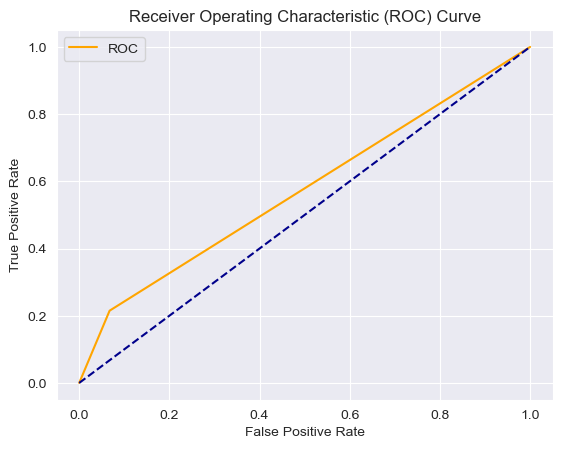

In [219]:
fpr, tpr, thresholds = roc_curve(ypred_dt,testy)
plot_roc_curve(fpr,tpr)

In [220]:
model_metrics['model'].append('standard scaled Decision Tree ')
model_metrics['accuracy'].append(accuracy_score(ypred_dt, testy).round(2)*100)
model_metrics['f1_score'].append(f1_score(ypred_dt, testy).round(2)*100)
model_metrics['precision'].append(precision_score(ypred_dt, testy).round(2)*100)
model_metrics['recall'].append(recall_score(ypred_dt, testy).round(2)*100)
model_metrics['confusion matrix'].append(confusion_matrix(ypred_dt,testy).tolist())
model_metrics['roc_auc_score'].append(roc_auc_score(ypred_dt,testy).round(2)*100)

In [221]:
model.fit(train_x_smt_pca,train_y_smt)
ypred_dt=model.predict(train_x_smt_pca)


print('f1_score        ',f1_score(ypred_dt,train_y_smt))
print('accuracy_score  ',accuracy_score(ypred_dt,train_y_smt))
print('precision_score ',precision_score(ypred_dt,train_y_smt))
print('recall_score    ',recall_score(ypred_dt,train_y_smt))
print("ROC-AUC Score   ", roc_auc_score(ypred_dt,train_y_smt))
print('classification_report test_pca')
print(classification_report(ypred_dt,train_y_smt))
print('confusion_matrix')
print(confusion_matrix(ypred_dt,train_y_smt))

f1_score         1.0
accuracy_score   1.0
precision_score  1.0
recall_score     1.0
ROC-AUC Score    1.0
classification_report test_pca
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93695
           1       1.00      1.00      1.00     93695

    accuracy                           1.00    187390
   macro avg       1.00      1.00      1.00    187390
weighted avg       1.00      1.00      1.00    187390

confusion_matrix
[[93695     0]
 [    0 93695]]


In [80]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()


d_grid={'criterion':['gini','entropy','log_loss'],
        'splitter':['best', 'random'],
        "max_depth": (list(range(1,100))),
        "min_samples_split": [2,3,4,5],
        
        "min_samples_leaf": [1,2,3]}

dtree_cv=RandomizedSearchCV(dtree,d_grid,scoring='accuracy',n_jobs=-1,refit=True,cv=5,verbose=2)
dtree_cv.fit(val_x_pca, val_y_pca)
print(dtree_cv.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'splitter': 'random', 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_depth': 11, 'criterion': 'entropy'}


In [81]:
print(dtree_cv.best_score_)

0.9058507061197041


In [222]:
model=DecisionTreeClassifier(criterion='gini',max_depth=4,min_samples_leaf=3,min_samples_split=5,splitter='best',random_state=37)

model.fit(train_x_smt_pca,train_y_smt)
ypred_dt_hp=model.predict(test_pca)


print('f1_score        ',f1_score(ypred_dt_hp,testy))
print('accuracy_score  ',accuracy_score(ypred_dt_hp,testy))
print('precision_score ',precision_score(ypred_dt_hp,testy))
print('recall_score    ',recall_score(ypred_dt_hp,testy))
print("ROC-AUC Score   ", roc_auc_score(ypred_dt_hp,testy))
print('classification_report test_pca')
print(classification_report(ypred_dt_hp,testy))
print('confusion_matrix')
print(confusion_matrix(ypred_dt_hp,testy))

f1_score         0.41377425526100026
accuracy_score   0.7836218375499334
precision_score  0.7585170340681363
recall_score     0.28447951897782786
ROC-AUC Score    0.6256241118233781
classification_report test_pca
              precision    recall  f1-score   support

           0       0.79      0.97      0.87     36261
           1       0.76      0.28      0.41     13305

    accuracy                           0.78     49566
   macro avg       0.77      0.63      0.64     49566
weighted avg       0.78      0.78      0.75     49566

confusion_matrix
[[35056  1205]
 [ 9520  3785]]


In [223]:
model_metrics['model'].append('standard scaled Decision Tree hyperparameters tuned ')
model_metrics['accuracy'].append(accuracy_score(ypred_dt_hp, testy).round(2)*100)
model_metrics['f1_score'].append(f1_score(ypred_dt_hp, testy).round(2)*100)
model_metrics['precision'].append(precision_score(ypred_dt_hp, testy).round(2)*100)
model_metrics['recall'].append(recall_score(ypred_dt_hp, testy).round(2)*100)
model_metrics['confusion matrix'].append(confusion_matrix(ypred_dt_hp,testy).tolist())
model_metrics['roc_auc_score'].append(roc_auc_score(ypred_dt_hp,testy).round(2)*100)

The lower performance metrics on the testing data compared to the training data suggest potential overfitting, highlighting the need for regularization techniques or model complexity reduction in the decision tree model.

## XGBClassifier

In [224]:
from xgboost import XGBClassifier
model=XGBClassifier(random_state=50)

In [225]:
# testing data
model.fit(train_x_smt_pca,train_y_smt)
ypred_xgb=model.predict(test_pca)


print('f1_score        ',f1_score(ypred_xgb,testy))
print('accuracy_score  ',accuracy_score(ypred_xgb,testy))
print('precision_score ',precision_score(ypred_xgb,testy))
print('recall_score    ',recall_score(ypred_xgb,testy))
print("ROC-AUC Score   ", roc_auc_score(ypred_xgb,testy))
print('classification_report test_pca')
print(classification_report(ypred_xgb,testy))
print('confusion_matrix')
print(confusion_matrix(ypred_xgb,testy))

f1_score         0.38145695364238413
accuracy_score   0.8492515030464431
precision_score  0.4617234468937876
recall_score     0.32496473906911144
ROC-AUC Score    0.6308645147459693
classification_report test_pca
              precision    recall  f1-score   support

           0       0.89      0.94      0.91     42476
           1       0.46      0.32      0.38      7090

    accuracy                           0.85     49566
   macro avg       0.68      0.63      0.65     49566
weighted avg       0.83      0.85      0.84     49566

confusion_matrix
[[39790  2686]
 [ 4786  2304]]


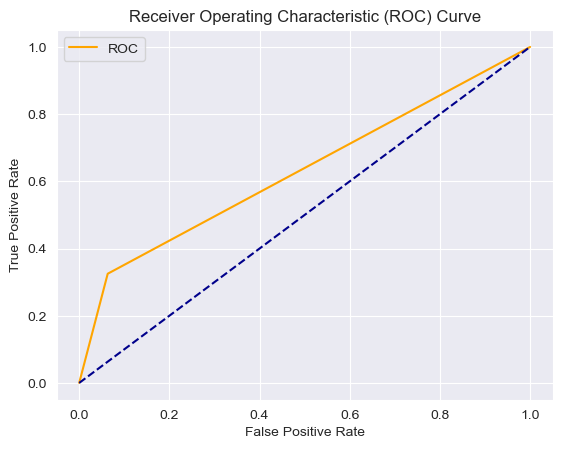

In [226]:
fpr, tpr, thresholds = roc_curve(ypred_xgb,testy)
plot_roc_curve(fpr,tpr)

In [227]:
model_metrics['model'].append('standard scaled XGB')
model_metrics['accuracy'].append(accuracy_score(ypred_xgb, testy).round(2)*100)
model_metrics['f1_score'].append(f1_score(ypred_xgb, testy).round(2)*100)
model_metrics['precision'].append(precision_score(ypred_xgb, testy).round(2)*100)
model_metrics['recall'].append(recall_score(ypred_xgb, testy).round(2)*100)
model_metrics['confusion matrix'].append(confusion_matrix(ypred_xgb,testy).tolist())
model_metrics['roc_auc_score'].append(roc_auc_score(ypred_xgb,testy).round(2)*100)

In [228]:
#training data
model.fit(train_x_smt_pca,train_y_smt)
ypred_xgb=model.predict(train_x_smt_pca)


print('f1_score        ',f1_score(ypred_xgb,train_y_smt))
print('accuracy_score  ',accuracy_score(ypred_xgb,train_y_smt))
print('precision_score ',precision_score(ypred_xgb,train_y_smt))
print('recall_score    ',recall_score(ypred_xgb,train_y_smt))
print('classification_report test_pca')
print(classification_report(ypred_xgb,train_y_smt))
print('confusion_matrix')
print(confusion_matrix(ypred_xgb,train_y_smt))

f1_score         0.9444158545060986
accuracy_score   0.9440898660547521
precision_score  0.9499546400554992
recall_score     0.9389412832035783
classification_report test_pca
              precision    recall  f1-score   support

           0       0.94      0.95      0.94     92596
           1       0.95      0.94      0.94     94794

    accuracy                           0.94    187390
   macro avg       0.94      0.94      0.94    187390
weighted avg       0.94      0.94      0.94    187390

confusion_matrix
[[87907  4689]
 [ 5788 89006]]


- The XGBoost Classifier demonstrates strong performance on both testing and training data, as indicated by high accuracy scores and good values for precision, recall, and F1-score over other model.

- The classifier seems to generalize well to unseen data, as the performance metrics on the testing data are comparable to those on the training data, indicating overfitting.

## Naive bayes


In [229]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()

In [230]:
# testing data
model.fit(train_x_smt_pca,train_y_smt)
ypred_nb=model.predict(test_pca)


print('f1_score        ',f1_score(ypred_nb,testy))
print('accuracy_score  ',accuracy_score(ypred_nb,testy))
print('precision_score ',precision_score(ypred_nb,testy))
print('recall_score    ',recall_score(ypred_nb,testy))
print("ROC-AUC Score   ", roc_auc_score(ypred_nb,testy))
print('classification_report test_pca')
print(classification_report(ypred_nb,testy))
print('confusion_matrix')
print(confusion_matrix(ypred_nb,testy))

f1_score         0.14501296863947183
accuracy_score   0.8536900294556753
precision_score  0.12324649298597194
recall_score     0.17611683848797252
ROC-AUC Score    0.5405804490221692
classification_report test_pca
              precision    recall  f1-score   support

           0       0.94      0.91      0.92     46074
           1       0.12      0.18      0.15      3492

    accuracy                           0.85     49566
   macro avg       0.53      0.54      0.53     49566
weighted avg       0.88      0.85      0.87     49566

confusion_matrix
[[41699  4375]
 [ 2877   615]]


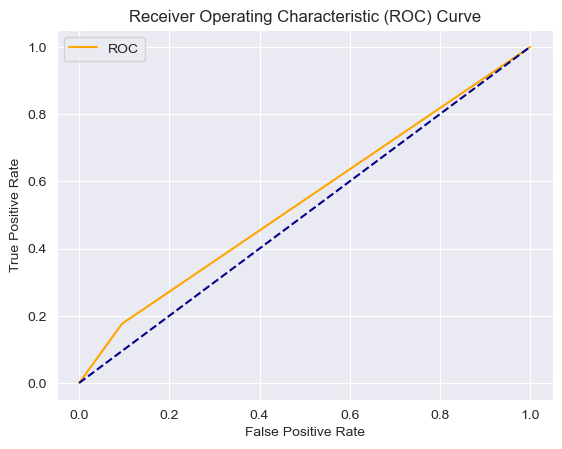

In [231]:
fpr, tpr, thresholds = roc_curve(ypred_nb,testy)
plot_roc_curve(fpr,tpr)

In [232]:
model_metrics['model'].append('standard scaled naive bayes ')
model_metrics['accuracy'].append(accuracy_score(ypred_nb, testy).round(2)*100)
model_metrics['f1_score'].append(f1_score(ypred_nb, testy).round(2)*100)
model_metrics['precision'].append(precision_score(ypred_nb, testy).round(2)*100)
model_metrics['recall'].append(recall_score(ypred_nb, testy).round(2)*100)
model_metrics['confusion matrix'].append(confusion_matrix(ypred_nb,testy).tolist())
model_metrics['roc_auc_score'].append(roc_auc_score(ypred_nb,testy).round(2)*100)

- The Naive Bayes classifier demonstrates limited performance on the testing data, particularly in correctly identifying positive instances.

- Overfitting to the training data may be a concern, as the performance metrics on the training data are higher compared to the testing data.

## Random Forest Classifier

In [233]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier(random_state=37)
model.fit(train_x_smt_pca,train_y_smt)
ypred_rf=model.predict(test_pca)


print('f1_score        ',f1_score(ypred_rf,testy))
print('accuracy_score  ',accuracy_score(ypred_rf,testy))
print('precision_score ',precision_score(ypred_rf,testy))
print('recall_score    ',recall_score(ypred_rf,testy))
print("ROC-AUC Score   ", roc_auc_score(ypred_rf,testy))
print('classification_report test_pca')
print(classification_report(ypred_rf,testy))
print('confusion_matrix')
print(confusion_matrix(ypred_rf,testy))

f1_score         0.36242826940501355
accuracy_score   0.8722309647742404
precision_score  0.36072144288577157
recall_score     0.3641513251062108
ROC-AUC Score    0.6463317636668807
classification_report test_pca
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     44623
           1       0.36      0.36      0.36      4943

    accuracy                           0.87     49566
   macro avg       0.65      0.65      0.65     49566
weighted avg       0.87      0.87      0.87     49566

confusion_matrix
[[41433  3190]
 [ 3143  1800]]


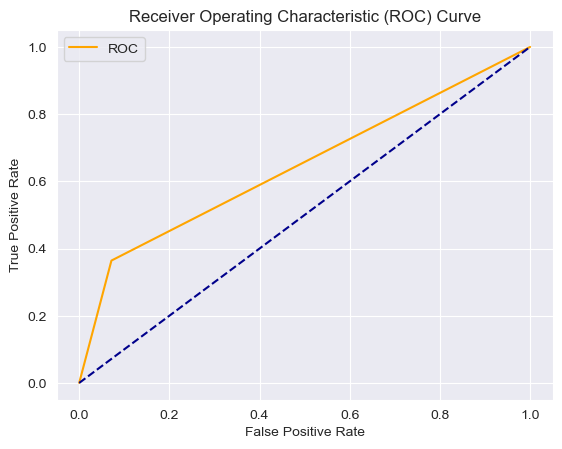

In [234]:
fpr, tpr, thresholds = roc_curve(ypred_rf,testy)
plot_roc_curve(fpr,tpr)

In [235]:
model_metrics['model'].append('standard scaled Random Forest Classifier ')
model_metrics['accuracy'].append(accuracy_score(ypred_rf, testy).round(2)*100)
model_metrics['f1_score'].append(f1_score(ypred_rf, testy).round(2)*100)
model_metrics['precision'].append(precision_score(ypred_rf, testy).round(2)*100)
model_metrics['recall'].append(recall_score(ypred_rf, testy).round(2)*100)
model_metrics['confusion matrix'].append(confusion_matrix(ypred_rf,testy).tolist())
model_metrics['roc_auc_score'].append(roc_auc_score(ypred_rf,testy).round(2)*100)

In [236]:
#model.fit(train_x_smt_pca,train_y_smt)
ypred_rf=model.predict(train_x_smt_pca)


print('f1_score        ',f1_score(ypred_rf,train_y_smt))
print('accuracy_score  ',accuracy_score(ypred_rf,train_y_smt))
print('precision_score ',precision_score(ypred_rf,train_y_smt))
print('recall_score    ',recall_score(ypred_rf,train_y_smt))
print("ROC-AUC Score   ", roc_auc_score(ypred_rf,train_y_smt))
print('classification_report test_pca')
print(classification_report(ypred_rf,train_y_smt))
print('confusion_matrix')
print(confusion_matrix(ypred_rf,train_y_smt))

f1_score         0.999994663507463
accuracy_score   0.9999946635359411
precision_score  0.9999893270718822
recall_score     1.0
ROC-AUC Score    0.9999946635928962
classification_report test_pca
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93696
           1       1.00      1.00      1.00     93694

    accuracy                           1.00    187390
   macro avg       1.00      1.00      1.00    187390
weighted avg       1.00      1.00      1.00    187390

confusion_matrix
[[93695     1]
 [    0 93694]]


- The Random Forest Classifier shows acceptable performance on the testing data, with a balanced accuracy score and moderate precision, recall, and F1-score values for both classes. However, its performance is still relatively low.

- Given the performance of the previous model and scores, there is a suspicion that further adjustments are needed in feature engineering. To verify this, let's proceed with additional modelin






#  Model evaluation


- From the above analysis, it's evident that most of the models exhibit overfitting on the training data, and their performance is relatively lower. Therefore, exploring alternative approaches for feature engineering is essential to mitigate model overfitting and reduce high variance.

# Feature Engineering - 2

In [99]:
data=pd.read_csv(r"C:\Users\ALTRIN JINO\OneDrive\Desktop\Project\Transaction\train(1).csv")

In [100]:
x=data.drop(columns=['target','ID_code'])
y=data['target']

In [101]:
x.columns

Index(['var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7',
       'var_8', 'var_9',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=200)

In [102]:
R_data=data.copy()

In [103]:
sal=R_data.iloc[:,2:]

In [104]:
sal

var_0  var_1  var_2  var_3  var_4  var_5  var_6  var_7  var_8  var_9  \
0        8.93  -6.79  11.91   5.09  11.46  -9.28   5.12  18.63  -4.92   5.75   
1       11.50  -4.15  13.86   5.39  12.36   7.04   5.62  16.53   3.15   8.09   
2        8.61  -2.75  12.08   7.89  10.58  -9.08   6.94  14.62  -4.92   5.95   
3       11.06  -2.15   8.95   7.20  12.58  -1.84   5.84  14.93  -5.86   8.24   
4        9.84  -1.48  12.87   6.64  12.28   2.45   5.94  19.25   6.27   7.68   
...       ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
199995  11.49  -0.50   8.26   3.51  10.34  11.61   5.67  15.15  -0.62   5.67   
199996   4.91  -2.45  16.71   6.63   8.31 -10.56   5.88  21.59  -3.68   6.00   
199997  11.22  -5.05  10.51   5.65   9.34  -5.41   4.56  21.56   0.12   6.16   
199998   9.71  -8.61  13.61   5.79  12.52   0.53   6.05  17.02  -2.19   8.75   
199999  10.88  -5.71  12.12   8.03  11.56   0.35   5.28  15.21  -0.45   9.37   

        var_10  var_11  var_12  var_13  var_14  var_15  var_16  var_17  \
0         2.93    3.18   14.01    0.57    8.80   14.57    5.75   -7.24   
1        -0.40    8.06   14.02    8.41    5.43   13.70   13.83  -15.58   
2        -0.32  -11.26   14.19    7.31    7.52   14.65    7.68   -1.74   
3         2.31    2.81   13.85   11.97    6.46   14.84   10.74   -0.43   
4        -9.45  -12.14   13.85    7.89    7.79   15.06    8.49   -3.07   
...        ...     ...     ...     ...     ...     ...     ...     ...   
199995    3.76   -9.53   13.99    5.30    8.27   14.15    7.45   -5.01   
199996    6.56  -11.88   14.41    3.31    3.58   14.16    7.52   -8.87   
199997    4.40   -0.47   13.88    9.74   10.90   14.56    9.62   -1.64   
199998    1.42    0.71   14.21    6.56    7.62   13.88    9.05  -11.82   
199999   -7.38   -8.70   14.25   15.08    5.23   14.36   12.55   -6.51   

        var_18  var_19  var_20  var_21  var_22  var_23  var_24  var_25  \
0         4.28   30.71   10.54   16.22    2.58    2.47   14.38   13.43   
1         7.80   28.57    3.43    2.74    8.55    3.37    6.98   13.89   
2         4.70   20.48   17.76   18.14    1.21    3.51    5.68   13.22   
3        15.94   13.73   20.30   12.56    6.82    2.72   12.14   13.74   
4         6.53   11.32   21.42   18.96   10.11    2.71   14.21   13.54   
...        ...     ...     ...     ...     ...     ...     ...     ...   
199995   12.05    8.63    9.91   25.14    1.09    3.23    7.78   13.99   
199996   17.95   17.02    6.65   18.23    0.90    2.25   15.50   13.33   
199997   23.11   12.15   16.26    3.15    3.10    2.15   10.27   13.56   
199998   14.08   -2.03   18.39    3.09    5.58    3.71   12.82   13.89   
199999   11.36   11.48   15.50    3.85    2.44    2.83   10.67   13.72   

        var_26  var_27  var_28  var_29  var_30  var_31  var_32  var_33  \
0        -5.15   -0.41    4.93    6.00   -0.31   12.90   -3.88   16.89   
1       -11.77   -2.56    5.05    0.55   -9.30    7.88    1.29   19.37   
2        -7.99   -2.90    5.85    6.14  -11.10   12.49   -2.29   19.04   
3         0.81   -0.91    5.91    2.84  -15.24   10.44   -2.57    6.18   
4         3.17   -3.34    5.90    7.94   -3.16    9.47   -0.01   19.32   
...        ...     ...     ...     ...     ...     ...     ...     ...   
199995    2.91    0.10    4.24    7.57   -9.21    9.57    1.40    7.42   
199996    5.23   -3.74    5.51    5.71  -13.75    7.44    1.30   12.76   
199997    4.95   -0.99    6.28    9.49  -12.85   11.04    1.43   13.85   
199998   -3.39   -0.44    5.48    4.09   -7.71   10.40    2.57   17.85   
199999   -7.78   -2.78    6.29    6.01    2.15   10.82   -0.27   12.53   

        var_34  var_35  var_36  var_37  var_38  var_39  var_40  var_41  \
0        11.19   10.58    0.68    7.89    4.67    3.87   -5.24    7.37   
1        11.37    0.74    2.80    5.84   10.82    3.68  -11.11    1.87   
2        11.04    4.11    4.70    6.93   10.89    0.90  -13.52    2.24   
3        10.61   -5.92    8.17    2.85    9.17    0.67   -3.83   -1.04   
4        1

## Robust Scaler

In [105]:
from sklearn.preprocessing import RobustScaler 
scaler = RobustScaler()
R_data.iloc[:,2:]=scaler.fit_transform(sal)


- Robust scaling was applied to the dataset before performing any train-test split.
- This approach was chosen because the dataset contained a large number of outliers.
- By using RobustScaler, the scaling process was less affected by outliers, leading to a more robust scaling of the features.s.

In [106]:
R_data

ID_code  target  var_0  var_1  var_2  var_3  var_4  var_5  var_6  \
0            train_0       0  -0.37  -0.85   0.35  -0.56   0.15  -0.37  -0.22   
1            train_1       0   0.23  -0.42   0.86  -0.47   0.53   0.98   0.19   
2            train_2       0  -0.45  -0.19   0.40   0.35  -0.22  -0.35   1.26   
3            train_3       0   0.12  -0.09  -0.43   0.12   0.62   0.25   0.37   
4            train_4       0  -0.16   0.02   0.60  -0.06   0.49   0.60   0.45   
...              ...     ...    ...    ...    ...    ...    ...    ...    ...   
199995  train_199995       0   0.22   0.18  -0.61  -1.08  -0.32   1.36   0.23   
199996  train_199996       0  -1.30  -0.14   1.61  -0.06  -1.18  -0.47   0.40   
199997  train_199997       0   0.16  -0.56  -0.02  -0.38  -0.74  -0.05  -0.67   
199998  train_199998       0  -0.19  -1.15   0.80  -0.34   0.59   0.44   0.54   
199999  train_199999       0   0.08  -0.67   0.41   0.39   0.19   0.43  -0.08   

        var_7  var_8  var_9  var_10  var_11  var_12  var_13  var_14  var_15  \
0        0.42  -1.01  -0.96    0.31    0.77   -0.04   -1.11    0.37   -0.01   
1        0.01   0.52   0.23   -0.11    1.36   -0.01   -0.03   -0.60   -1.43   
2       -0.36  -1.01  -0.85   -0.10   -0.95    0.62   -0.18    0.00    0.12   
3       -0.30  -1.19   0.31    0.23    0.73   -0.66    0.47   -0.30    0.43   
4        0.54   1.12   0.02   -1.25   -1.06   -0.66   -0.10    0.08    0.79   
...       ...    ...    ...     ...     ...     ...     ...     ...     ...   
199995  -0.25  -0.19  -1.00    0.41   -0.75   -0.15   -0.46    0.22   -0.69   
199996   1.00  -0.78  -0.83    0.76   -1.03    1.43   -0.74   -1.13   -0.68   
199997   0.99  -0.05  -0.75    0.49    0.34   -0.55    0.16    0.97   -0.02   
199998   0.11  -0.49   0.57    0.12    0.48    0.69   -0.28    0.03   -1.14   
199999  -0.24  -0.16   0.88   -0.99   -0.65    0.83    0.90   -0.66   -0.35   

        var_16  var_17  var_18  var_19  var_20  var_21  var_22  var_23  \
0        -0.97   -0.16   -0.92    1.50   -0.29   -0.09   -0.41   -0.70   
1         1.28   -1.03   -0.62    1.33   -1.06   -1.26    1.04    0.47   
2        -0.43    0.41   -0.89    0.66    0.49    0.08   -0.74    0.66   
3         0.42    0.54    0.06    0.10    0.77   -0.41    0.62   -0.37   
4        -0.21    0.27   -0.73   -0.09    0.89    0.15    1.42   -0.38   
...        ...     ...     ...     ...     ...     ...     ...     ...   
199995   -0.49    0.07   -0.27   -0.31   -0.35    0.68   -0.77    0.29   
199996   -0.48   -0.33    0.23    0.38   -0.71    0.09   -0.82   -0.98   
199997    0.11    0.42    0.67   -0.02    0.33   -1.22   -0.29   -1.12   
199998   -0.05   -0.64   -0.09   -1.19    0.56   -1.23    0.32    0.91   
199999    0.92   -0.09   -0.32   -0.08    0.25   -1.16   -0.45   -0.23   

        var_24  var_25  var_26  var_27  var_28  var_29  var_30  var_31  \
0         0.68   -0.56   -0.12    0.31   -0.55    0.29    0.58    0.84   
1        -0.58    0.56   -0.92   -0.61   -0.44   -1.21   -0.15   -0.83   
2        -0.80   -1.09   -0.46   -0.76    0.28    0.33   -0.30    0.70   
3         0.30    0.18    0.61    0.10    0.34   -0.58   -0.64    0.02   
4         0.65   -0.29    0.90   -0.95    0.33    0.82    0.35   -0.30   
...        ...     ...     ...     ...     ...     ...     ...     ...   
199995   -0.44    0.81    0.86    0.53   -1.18    0.72   -0.15   -0.26   
199996    0.87   -0.82    1.14   -1.12   -0.02    0.21   -0.51   -0.97   
199997   -0.02   -0.24    1.11    0.06    0.68    1.25   -0.44    0.22   
199998    0.42    0.55    0.10    0.30   -0.05   -0.24   -0.02    0.01   
199999    0.05    0.13   -0.43   -0.71    0.68    0.29    0.78    0.15   

        var_32  var_33  var_34  var_35  var_36  var_37  var_38  var_39  \
0        -0.85    0.35   -0.30    0.90   -0.34    0.58   -0.98    0.55   
1         0.45    0.72   -0.08   -0.43    0.13   -0.02    0.04    0.51   
2        -0.45    0.67   -0.48    0.03    0.56    0.30    0.05    0.04   
3        -0.52   

In [107]:
R_data.drop(columns='ID_code',inplace=True)

## Feature selection

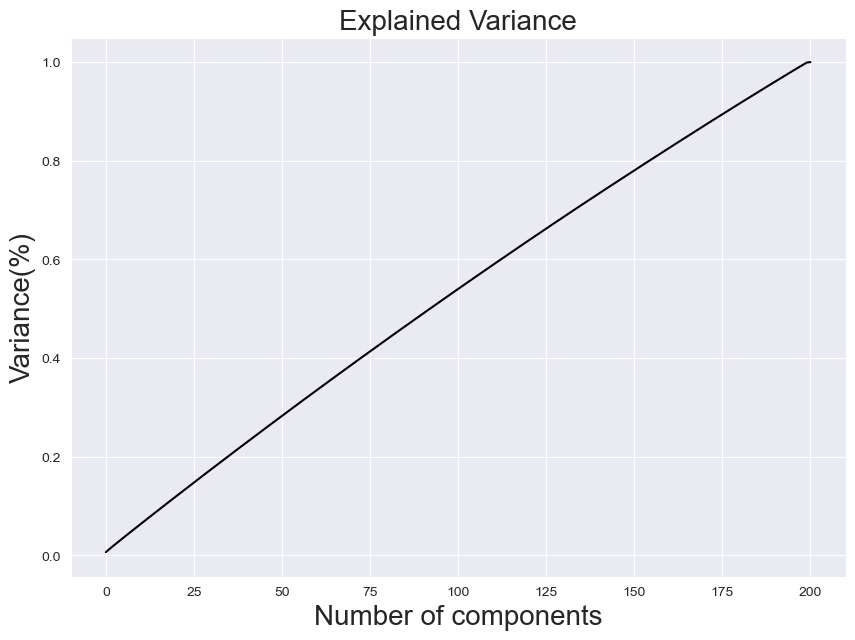

In [108]:
from sklearn.decomposition import PCA
pca = PCA()
principlecomponent = pca.fit_transform(R_data)  
plt.figure(figsize=(10,7))
sns.set_style('darkgrid')
plt.plot(np.cumsum(pca.explained_variance_ratio_),color ='k')
plt.xlabel('Number of components',fontsize=20)
plt.ylabel('Variance(%)',fontsize=20)
plt.title('Explained Variance',fontsize=20)
plt.show()


In [109]:
from sklearn.decomposition import PCA
#pca = PCA()
pca = PCA(random_state=47,n_components= 175)
pca_data = pca.fit_transform(R_data)
PCA_data = pd.DataFrame(pca_data)

From the PCA graph, it's evident that around 175 columns contribute to 90% of the variance in the dataset. This implies that a significant amount of information is captured by these 175 columns. Utilizing only these columns for computations can lead to faster processing without losing much information, making the analysis more efficient.

In [110]:
PCA_data

0     1     2     3     4     5     6     7     8     9     10   \
0      -0.52  0.27  0.05 -0.37 -0.84 -0.66 -1.32 -1.06  0.85  0.43 -0.10   
1       1.32 -0.53  1.96  1.31 -0.33 -0.05  1.18 -0.14 -0.44  0.60 -0.51   
2      -0.04 -0.82 -0.33  0.23  0.01 -0.14 -0.11  0.23  0.77  0.08  0.65   
3       1.38  0.37  0.46 -0.64 -0.38  0.12  1.27 -0.16 -0.62  0.58 -0.94   
4       0.59 -0.16  0.58 -0.84  0.15 -0.40 -0.68  0.87  0.35 -0.45 -0.19   
...      ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
199995 -0.25 -0.75  0.32  0.34 -1.30 -0.25 -1.29  1.36  0.48  1.57 -0.13   
199996 -0.15 -0.17 -0.62  1.03  0.87 -0.60  1.46  1.65 -0.42 -0.38  0.05   
199997  0.01  0.56  0.65  0.85 -0.99  0.19  0.08 -0.53  0.14  1.01 -0.78   
199998 -0.41  0.24  0.38  1.94 -0.53 -0.93  0.13  1.25  0.75 -0.93 -0.51   
199999 -0.77 -0.17  0.40 -0.56  0.40  0.10 -0.29  1.15 -0.60 -0.26  0.26   

         11    12    13    14    15    16    17    18    19    20    21   \
0       0.19 -0.04 -0.67 -0.02  0.76  0.17 -0.03  0.07  1.44 -0.55  1.06   
1       0.29  2.03  1.61 -0.51 -0.89  0.15  0.44  0.74 -0.53 -1.10 -0.96   
2      -0.89  0.29  0.77 -0.82  0.28 -0.66  0.06  0.45 -0.34  0.99 -0.58   
3      -0.79  0.87  0.82 -0.59  0.35 -0.17  0.02  0.86  0.87  0.18  0.30   
4      -0.59 -0.62 -0.19  0.23  0.31  0.47 -0.13 -0.33 -1.02  0.87  0.21   
...      ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
199995  0.13 -0.49 -0.84  0.18  0.77  0.32 -0.90  0.46 -0.25  0.12  0.19   
199996  0.92  0.45  0.68  0.74 -0.57 -0.83 -0.84 -0.90 -0.61  1.85  0.09   
199997 -1.01 -0.55 -1.25  1.89 -0.40  0.65  0.25  0.41  0.71 -0.16  0.11   
199998 -0.26  1.23  0.46 -0.05  0.30 -0.38  0.57 -1.02 -0.71 -2.20  0.05   
199999 -0.79 -0.39  0.13 -0.47 -0.86 -0.43  0.38  1.19  0.33  0.49 -0.58   

         22    23    24    25    26    27    28    29    30    31    32   \
0      -1.19  0.73  0.07 -0.08 -0.89  0.81 -0.01 -0.76 -0.27 -0.37  0.26   
1       1.07 -1.14 -2.08  0.58  1.05 -0.94 -0.38  0.16  0.06 -0.11 -0.97   
2       0.45  0.29 -0.19  0.29  0.62  0.39  0.63 -0.08 -1.63 -0.58  0.17   
3       0.20  0.10 -0.04  0.04 -0.87  0.15 -1.03  0.39 -0.59  0.25  0.28   
4      -0.22  0.86  0.88  0.57  0.06 -0.05 -1.16  1.11  0.53 -0.45 -1.00   
...      ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
199995  0.67  1.77  0.20 -1.17 -0.04 -0.67 -0.04  0.25  0.10  0.73 -0.74   
199996 -0.29  0.06 -0.72 -1.50  0.15 -0.00  0.08  0.18  0.03 -0.47 -0.66   
199997 -0.36 -0.27 -0.46 -0.49 -1.28  0.22  0.58 -0.03 -0.90 -0.10  0.10   
199998  0.42 -0.00  0.59 -0.85 -0.35 -0.83 -0.70  0.71  0.42 -0.63 -0.27   
199999  0.53  0.53  0.24  0.88 -0.68  0.62  1.35  0.75 -0.42  1.56 -0.18   

         33    34    35    36    37    38    39    40    41    42    43   \
0       0.00 -0.66  0.05 -0.68 -0.05 -0.09 -0.40 -0.22 -0.92  0.61  0.34   
1      -0.22  0.83 -1.08  0.58 -1.05  0.17  0.95  0.28 -0.70  0.11 -0.48   
2      -0.50 -0.92  0.62  0.15 -0.12  0.44  0.33 -0.67 -0.10  0.08  0.04   
3       0.86  0.60 -0.21 -0.70  0.44  0.17 -0.20  0.75  0.58 -0.59  0.56   
4       0.39 -0.37 -0.48 -0.07  0.83  0.64  0.43 -0.87  0.07 -0.63  0.18   
...      ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
199995  0.27 -0.74  0.56  0.39 -0.54  0.15 -0.49 -0.33 -0.30  1.21 -0.06   
199996 -0.75  1.03  1.49 -0.21  0.23 -0.08 -1.00 -0.28 -0.25 -0.75  0.13   
199997  0.66 -0.65 -0.76  0.20  0.16  0.59  0.50 -0.39 -0.29 -0.24 -0.02   
199998  1.39 -0.16 -0.20 -0.97 -0.69 -0.04  1.39  0.03 -1.40 -0.18 -0.89   
199999  1.02  0.95 -0.97  0.89  0.06 -0.77  0.06  0.74 -0.08 -1.10  0.41   

         44    45    46    47    48    49    50    51    52    53    54   \
0       0.70 -0.17 -0.65  1.06 -0.48 -1.07  1.49 -0.39  0.25  0.51 -1.01   
1      -1.35  0.74 -0.07 -0.60  0.58  0.22 -0.31  0.20  0.23  0.63  0.15   
2       0.05  0.48  0.47 -0.05 -0.09  0.02 -0.27 -1.09 -0.01 -0.06 -1.43   
3       0.98  0.21  0.69 -0.97 -0.79 -0.27  0.11  1.2

In [111]:
X = PCA_data
Y = data.target

In [112]:
from imblearn.over_sampling import SMOTE
smt=SMOTE(random_state=47)
sca_x,sca_y=smt.fit_resample(X,Y)
print (y.value_counts())
print(sca_y.value_counts())

target
0    179902
1     20098
Name: count, dtype: int64
target
0    179902
1    179902
Name: count, dtype: int64


- Synthetic Minority Over-sampling Technique (SMOTE) was applied after robust scaling and before the train-test split.
- This order of operations ensured that SMOTE generated synthetic samples based on the scaled features, which could improve the effectiveness of over-sampling.
- SMOTE was used to address class imbalance in the dataset, particularly for the minority class.

In [113]:
from sklearn.model_selection import train_test_split
X_train, test_x, y_train, test_y = train_test_split(sca_x,sca_y,test_size=0.25, random_state=42)
train_x, val_x, train_y, val_y = train_test_split(X_train, y_train, test_size=0.25, random_state=42)
print("Training set:", train_x.shape, train_y.shape)
print("Validation set:", val_x.shape, val_y.shape)
print("Test set:", test_x.shape, test_y.shape)


Training set: (202389, 175) (202389,)
Validation set: (67464, 175) (67464,)
Test set: (89951, 175) (89951,)


- The train-test split was performed after robust scaling and SMOTE.
- Although it's typically recommended to split the data before preprocessing steps to avoid data leakage, in this case, the order of operations did not compromise the integrity of the test set.
- The robust scaling and SMOTE techniques were applied in a way that ensured consistency and effectiveness in both the training and testing datasets.

# Machine Learning Implementation

In [114]:
model_metrics = {
    'model': [],
    'roc_auc_score':[],
    'f1_score': [],
    'accuracy': [],    
    'precision': [],
    'recall': [],
    'confusion matrix':[]
    
}


## LogisticRegression

In [115]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score,confusion_matrix,roc_auc_score,roc_curve
model=LogisticRegression(random_state=45)

In [116]:
# testing data
model.fit(train_x,train_y)
ypred_r_lr=model.predict(test_x)


print('f1_score        ',f1_score(ypred_r_lr,test_y))
print('accuracy_score  ',accuracy_score(ypred_r_lr,test_y))
print('precision_score ',precision_score(ypred_r_lr,test_y))
print('recall_score    ',recall_score(ypred_r_lr,test_y))
print("ROC-AUC Score   ", roc_auc_score(ypred_r_lr,test_y))
print('classification_report test_pca')
print(classification_report(ypred_r_lr,test_y))
print('confusion_matrix')
print(confusion_matrix(ypred_r_lr,test_y))




f1_score         0.8354757202281781
accuracy_score   0.834231970739625
precision_score  0.8428879934100675
recall_score     0.8281926762042263
ROC-AUC Score    0.8343327917495125
classification_report test_pca
              precision    recall  f1-score   support

           0       0.83      0.84      0.83     44237
           1       0.84      0.83      0.84     45714

    accuracy                           0.83     89951
   macro avg       0.83      0.83      0.83     89951
weighted avg       0.83      0.83      0.83     89951

confusion_matrix
[[37180  7057]
 [ 7854 37860]]


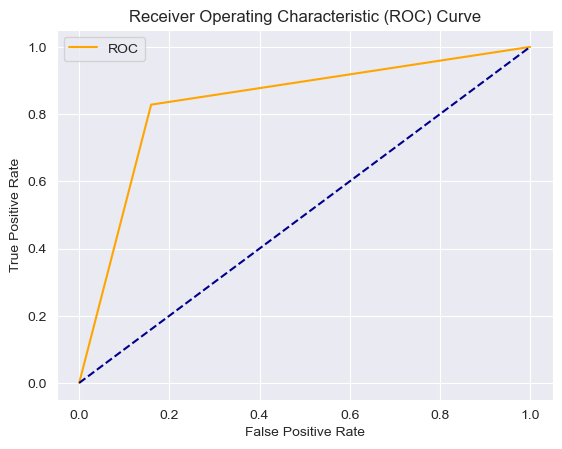

In [117]:
fpr, tpr, thresholds = roc_curve(ypred_r_lr,test_y)
plot_roc_curve(fpr,tpr)

In [118]:
model_metrics['model'].append('Robust Scaled LogisticRegression')
model_metrics['accuracy'].append(accuracy_score(ypred_r_lr, test_y).round(2)*100)
model_metrics['f1_score'].append(f1_score(ypred_r_lr, test_y).round(2)*100)
model_metrics['precision'].append(precision_score(ypred_r_lr, test_y).round(2)*100)
model_metrics['recall'].append(recall_score(ypred_r_lr, test_y).round(2)*100)
model_metrics['confusion matrix'].append(confusion_matrix(ypred_r_lr,test_y).tolist())
model_metrics['roc_auc_score'].append(roc_auc_score(ypred_r_lr,test_y).round(2)*100)

In [119]:
model.fit(train_x,train_y)
ypred_r_lr=model.predict(train_x)


print('f1_score        ',f1_score(ypred_r_lr,train_y))
print('accuracy_score  ',accuracy_score(ypred_r_lr,train_y))
print('precision_score ',precision_score(ypred_r_lr,train_y))
print('recall_score    ',recall_score(ypred_r_lr,train_y))
print("ROC-AUC Score   ", roc_auc_score(ypred_r_lr,train_y))
print('classification_report test_pca')
print(classification_report(ypred_r_lr,train_y))
print('confusion_matrix')
print(confusion_matrix(ypred_r_lr,train_y))

f1_score         0.8372470506558716
accuracy_score   0.835519716980666
precision_score  0.8443515304512464
recall_score     0.830261129265289
ROC-AUC Score    0.8356222027547481
classification_report test_pca
              precision    recall  f1-score   support

           0       0.83      0.84      0.83     99260
           1       0.84      0.83      0.84    103129

    accuracy                           0.84    202389
   macro avg       0.84      0.84      0.84    202389
weighted avg       0.84      0.84      0.84    202389

confusion_matrix
[[83476 15784]
 [17505 85624]]


- Testing Data: Achieved an F1-score of 0.84, indicating good balance between precision and recall. The accuracy score is 0.83, and the ROC-AUC score is 0.83.
- Training Data: Similar performance observed on the training data, with an F1-score of 0.84 and an accuracy score of 0.84.
- Inference: The model shows consistent performance on both testing and training data, suggesting good generalization. Hyperparameter tuning was not performed due to similar performance on both datasets.

## Artificial Neural Network

In [127]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(random_state=47)


In [128]:
# testing data
model.fit(train_x,train_y)
ypred_r_ann=model.predict(test_x)


print('f1_score        ',f1_score(ypred_r_ann,test_y))
print('accuracy_score  ',accuracy_score(ypred_r_ann,test_y))
print('precision_score ',precision_score(ypred_r_ann,test_y))
print('recall_score    ',recall_score(ypred_r_ann,test_y))
print("ROC-AUC Score   ", roc_auc_score(ypred_r_ann,test_y))
print('classification_report test_pca')
print(classification_report(ypred_r_ann,test_y))
print('confusion_matrix')
print(confusion_matrix(ypred_r_ann,test_y))




f1_score         0.9112887417507024
accuracy_score   0.9094395837733877
precision_score  0.9314958701605183
recall_score     0.8919397130614595
ROC-AUC Score    0.9102256996606959
classification_report test_pca
              precision    recall  f1-score   support

           0       0.89      0.93      0.91     43042
           1       0.93      0.89      0.91     46909

    accuracy                           0.91     89951
   macro avg       0.91      0.91      0.91     89951
weighted avg       0.91      0.91      0.91     89951

confusion_matrix
[[39965  3077]
 [ 5069 41840]]


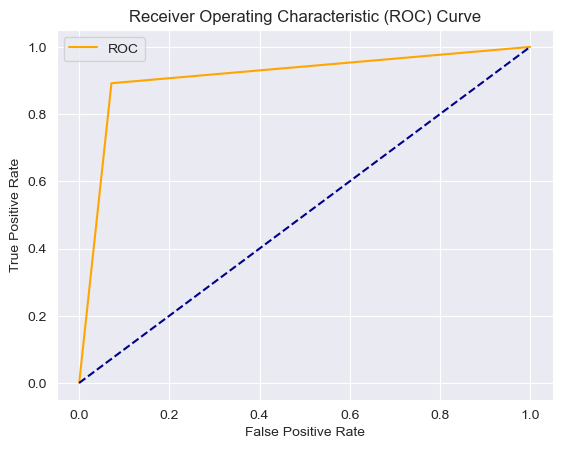

In [131]:
fpr, tpr, thresholds = roc_curve(ypred_r_ann,test_y)
plot_roc_curve(fpr,tpr)

In [132]:
model_metrics['model'].append('Robust Scaled  ANN')
model_metrics['accuracy'].append(accuracy_score(ypred_r_ann, test_y).round(2)*100)
model_metrics['f1_score'].append(f1_score(ypred_r_ann, test_y).round(2)*100)
model_metrics['precision'].append(precision_score(ypred_r_ann, test_y).round(2)*100)
model_metrics['recall'].append(recall_score(ypred_r_ann, test_y).round(2)*100)
model_metrics['confusion matrix'].append(confusion_matrix(ypred_r_ann,test_y).tolist())
model_metrics['roc_auc_score'].append(roc_auc_score(ypred_r_ann,test_y).round(2)*100)

In [133]:
#traing data
model.fit(train_x,train_y)
ypred_r_lr=model.predict(train_x)


print('f1_score        ',f1_score(ypred_r_lr,train_y))
print('accuracy_score  ',accuracy_score(ypred_r_lr,train_y))
print('precision_score ',precision_score(ypred_r_lr,train_y))
print('recall_score    ',recall_score(ypred_r_lr,train_y))
print("ROC-AUC Score   ", roc_auc_score(ypred_r_lr,train_y))
print('classification_report test_pca')
print(classification_report(ypred_r_lr,train_y))
print('confusion_matrix')
print(confusion_matrix(ypred_r_lr,train_y))

f1_score         0.9700817379870672
accuracy_score   0.9698699039967588
precision_score  0.9748934995266646
recall_score     0.9653172417833499
ROC-AUC Score    0.969925437595851
classification_report test_pca
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     99975
           1       0.97      0.97      0.97    102414

    accuracy                           0.97    202389
   macro avg       0.97      0.97      0.97    202389
weighted avg       0.97      0.97      0.97    202389

confusion_matrix
[[97429  2546]
 [ 3552 98862]]


- Testing Data: Demonstrated strong performance with an F1-score of 0.91, an accuracy score of 0.91, and a ROC-AUC score of 0.91.
- Training Data: Similar performance on the training data with an F1-score of 0.97 and an accuracy score of 0.97.
- Inference: The ANN model shows excellent performance on both datasets, indicating robust learning and generalization capabilities.

#### Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
model=MLPClassifier(random_state=47)
param_dist = {
    'hidden_layer_sizes': [(50,), (100,50), (150,50), (200,)],  
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'], 
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': list(np.arange(15)*100)  
}

random_ann=RandomizedSearchCV(n_iter=10,param_distributions=param_dist,estimator=model,cv=5)
random_ann.fit(val_x,val_y)
print(random_ann.best_params_)

run the code in the colab and got the output as (solver='adam',learning_rate='adaptive',hidden_layer_sizes=(300,100,50),alpha=0.01,activation='tanh')

In [135]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(random_state=47,solver='adam',learning_rate='adaptive',hidden_layer_sizes=(300,100,50),alpha=0.01,activation='tanh')


In [136]:
# testing data
model.fit(train_x,train_y)
ypred_r_ann_hp=model.predict(test_x)


print('f1_score        ',f1_score(ypred_r_ann_hp,test_y))
print('accuracy_score  ',accuracy_score(ypred_r_ann_hp,test_y))
print('precision_score ',precision_score(ypred_r_ann_hp,test_y))
print('recall_score    ',recall_score(ypred_r_ann_hp,test_y))
print("ROC-AUC Score   ", roc_auc_score(ypred_r_ann_hp,test_y))
print('classification_report test_pca')
print(classification_report(ypred_r_ann_hp,test_y))
print('confusion_matrix')
print(confusion_matrix(ypred_r_ann_hp,test_y))




f1_score         0.9365020826102047
accuracy_score   0.9349201231781747
precision_score  0.9610837767437719
recall_score     0.913146483342147
ROC-AUC Score    0.9360933466481098
classification_report test_pca
              precision    recall  f1-score   support

           0       0.91      0.96      0.93     42676
           1       0.96      0.91      0.94     47275

    accuracy                           0.93     89951
   macro avg       0.93      0.94      0.93     89951
weighted avg       0.94      0.93      0.93     89951

confusion_matrix
[[40928  1748]
 [ 4106 43169]]


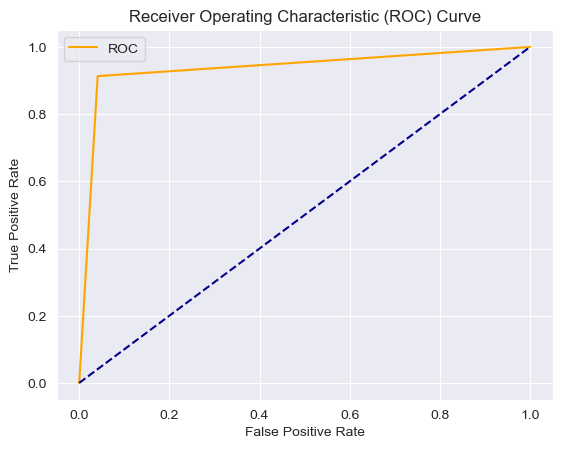

In [137]:
fpr, tpr, thresholds = roc_curve(ypred_r_ann_hp,test_y)
plot_roc_curve(fpr,tpr)

In [138]:
model_metrics['model'].append('Robust Scaled ANN hyperparameter tuned')
model_metrics['accuracy'].append(accuracy_score(ypred_r_ann_hp, test_y).round(2)*100)
model_metrics['f1_score'].append(f1_score(ypred_r_ann_hp, test_y).round(2)*100)
model_metrics['precision'].append(precision_score(ypred_r_ann_hp, test_y).round(2)*100)
model_metrics['recall'].append(recall_score(ypred_r_ann_hp, test_y).round(2)*100)
model_metrics['confusion matrix'].append(confusion_matrix(ypred_r_ann_hp,test_y).tolist())
model_metrics['roc_auc_score'].append(roc_auc_score(ypred_r_ann_hp,test_y).round(2)*100)

## XGBClassifier

In [139]:
from xgboost import XGBClassifier
model=XGBClassifier(random_state=50)

In [140]:
# testing data
model.fit(train_x,train_y)
ypred_r_xgb=model.predict(test_x)


print('f1_score        ',f1_score(ypred_r_xgb,test_y))
print('accuracy_score  ',accuracy_score(ypred_r_xgb,test_y))
print('precision_score ',precision_score(ypred_r_xgb,test_y))
print('recall_score    ',recall_score(ypred_r_xgb,test_y))
print("ROC-AUC Score   ", roc_auc_score(ypred_r_xgb,test_y))
print('classification_report test_pca')
print(classification_report(ypred_r_xgb,test_y))
print('confusion_matrix')
print(confusion_matrix(ypred_r_xgb,test_y))




f1_score         0.9040148485317189
accuracy_score   0.9034140809996554
precision_score  0.9108578043947726
recall_score     0.8972739434611926
ROC-AUC Score    0.9035001182337301
classification_report test_pca
              precision    recall  f1-score   support

           0       0.90      0.91      0.90     44354
           1       0.91      0.90      0.90     45597

    accuracy                           0.90     89951
   macro avg       0.90      0.90      0.90     89951
weighted avg       0.90      0.90      0.90     89951

confusion_matrix
[[40350  4004]
 [ 4684 40913]]


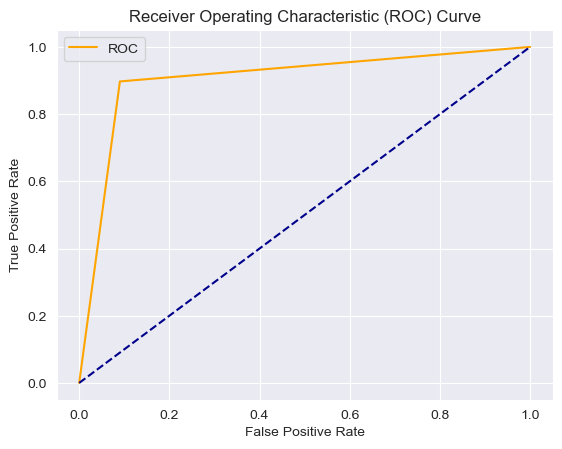

In [141]:
fpr, tpr, thresholds = roc_curve(ypred_r_xgb,test_y)
plot_roc_curve(fpr,tpr)

In [142]:
model_metrics['model'].append('Robust Scaled XGB')
model_metrics['accuracy'].append(accuracy_score(ypred_r_xgb, test_y).round(2)*100)
model_metrics['f1_score'].append(f1_score(ypred_r_xgb, test_y).round(2)*100)
model_metrics['precision'].append(precision_score(ypred_r_xgb, test_y).round(2)*100)
model_metrics['recall'].append(recall_score(ypred_r_xgb, test_y).round(2)*100)
model_metrics['confusion matrix'].append(confusion_matrix(ypred_r_xgb,test_y).tolist())
model_metrics['roc_auc_score'].append(roc_auc_score(ypred_r_xgb,test_y).round(2)*100)

In [143]:
#traing data

model.fit(train_x,train_y)
ypred_r_xgb=model.predict(train_x)


print('f1_score        ',f1_score(ypred_r_xgb,train_y))
print('accuracy_score  ',accuracy_score(ypred_r_xgb,train_y))
print('precision_score ',precision_score(ypred_r_xgb,train_y))
print('recall_score    ',recall_score(ypred_r_xgb,train_y))
print("ROC-AUC Score   ", roc_auc_score(ypred_r_xgb,train_y))
print('classification_report test_pca')
print(classification_report(ypred_r_xgb,train_y))
print('confusion_matrix')
print(confusion_matrix(ypred_r_xgb,train_y))

f1_score         0.9415797757229982
accuracy_score   0.9413110396316006
precision_score  0.9439196118649417
recall_score     0.9392515111076223
ROC-AUC Score    0.9413257465965373
classification_report test_pca
              precision    recall  f1-score   support

           0       0.94      0.94      0.94    100477
           1       0.94      0.94      0.94    101912

    accuracy                           0.94    202389
   macro avg       0.94      0.94      0.94    202389
weighted avg       0.94      0.94      0.94    202389

confusion_matrix
[[94790  5687]
 [ 6191 95721]]


- Testing Data: Performed well with an F1-score of 0.90, an accuracy score of 0.90, and a ROC-AUC score of 0.90.
- Training Data: Achieved an F1-score of 0.94 and an accuracy score of 0.94 on the training data.
- Inference: The XGBoost model shows strong performance, indicating its ability to generalize well.

## Decision Tree Classifier

In [144]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(random_state=37)

In [145]:
model.fit(train_x,train_y)
ypred_r_dt=model.predict(test_x)


print('f1_score        ',f1_score(ypred_r_dt,test_y))
print('accuracy_score  ',accuracy_score(ypred_r_dt,test_y))
print('precision_score ',precision_score(ypred_r_dt,test_y))
print('recall_score    ',recall_score(ypred_r_dt,test_y))
print("ROC-AUC Score   ", roc_auc_score(ypred_r_dt,test_y))
print('classification_report test_pca')
print(classification_report(ypred_r_dt,test_y))
print('confusion_matrix')
print(confusion_matrix(ypred_r_dt,test_y))


f1_score         0.8314996477155708
accuracy_score   0.8271836888972885
precision_score  0.8539083197898346
recall_score     0.810237018885462
ROC-AUC Score    0.8281232263131696
classification_report test_pca
              precision    recall  f1-score   support

           0       0.80      0.85      0.82     42613
           1       0.85      0.81      0.83     47338

    accuracy                           0.83     89951
   macro avg       0.83      0.83      0.83     89951
weighted avg       0.83      0.83      0.83     89951

confusion_matrix
[[36051  6562]
 [ 8983 38355]]


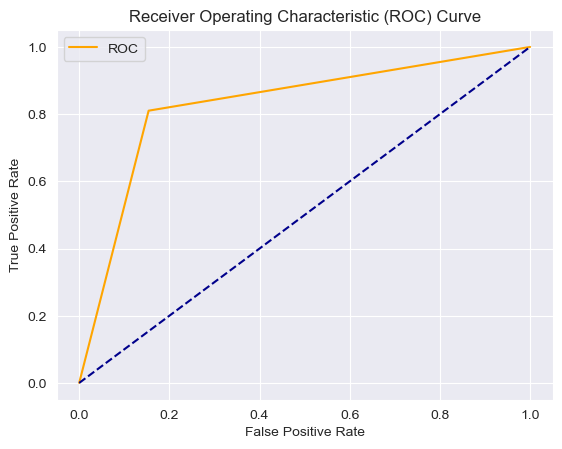

In [146]:
fpr, tpr, thresholds = roc_curve(ypred_r_dt,test_y)
plot_roc_curve(fpr,tpr)

In [147]:
#traing data
model.fit(train_x,train_y)
ypred_r_dt1=model.predict(train_x)


print('f1_score        ',f1_score(ypred_r_dt1,train_y))
print('accuracy_score  ',accuracy_score(ypred_r_dt1,train_y))
print('precision_score ',precision_score(ypred_r_dt1,train_y))
print('recall_score    ',recall_score(ypred_r_dt1,train_y))
print("ROC-AUC Score   ", roc_auc_score(ypred_r_dt1,train_y))
print('classification_report test_pca')
print(classification_report(ypred_r_dt1,train_y))
print('confusion_matrix')
print(confusion_matrix(ypred_r_dt1,train_y))

f1_score         1.0
accuracy_score   1.0
precision_score  1.0
recall_score     1.0
ROC-AUC Score    1.0
classification_report test_pca
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    100981
           1       1.00      1.00      1.00    101408

    accuracy                           1.00    202389
   macro avg       1.00      1.00      1.00    202389
weighted avg       1.00      1.00      1.00    202389

confusion_matrix
[[100981      0]
 [     0 101408]]


In [148]:
model_metrics['model'].append('Robust Scaled DecisionTree')
model_metrics['accuracy'].append(accuracy_score(ypred_r_dt, test_y).round(2)*100)
model_metrics['f1_score'].append(f1_score(ypred_r_dt, test_y).round(2)*100)
model_metrics['precision'].append(precision_score(ypred_r_dt, test_y).round(2)*100)
model_metrics['recall'].append(recall_score(ypred_r_dt, test_y).round(2)*100)
model_metrics['confusion matrix'].append(confusion_matrix(ypred_r_dt,test_y).tolist())
model_metrics['roc_auc_score'].append(roc_auc_score(ypred_r_dt,test_y).round(2)*100)

- Testing Data: Achieved an F1-score of 0.83, an accuracy score of 0.83, and a ROC-AUC score of 0.83.
- Training Data: The model achieved perfect scores of 1.0 for both F1-score and accuracy on the training data.
- Inference: The Decision Tree model shows good performance on the testing data but may be overfitting as indicated by the perfect scores on the training data. Further tuning or ensemble methods may improve its generalization.

#### Hyperparameter tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
dt_classifier = DecisionTreeClassifier()

param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['auto', 'sqrt', 'log2', None]
}

random_search = RandomizedSearchCV(dt_classifier,param_distributions=param_dist,n_iter=100,cv=5,scoring='accuracy',n_jobs=-1,random_state=42)
random_search.fit(val_x, val_y)

best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

In [ ]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(train_x,train_y)
ypred_r_dt_hp=dt_classifier.predict(test_x)


print('f1_score        ',f1_score(ypred_r_dt_hp,test_y))
print('accuracy_score  ',accuracy_score(ypred_r_dt_hp,test_y))
print('precision_score ',precision_score(ypred_r_dt_hp,test_y))
print('recall_score    ',recall_score(ypred_r_dt_hp,test_y))
print("ROC-AUC Score   ", roc_auc_score(ypred_r_dt_hp,test_y))
print('classification_report test_pca')
print(classification_report(ypred_r_dt_hp,test_y))
print('confusion_matrix')
print(confusion_matrix(ypred_r_dt_hp,test_y))

- Due to the high volume in the validation data, the kernel crashed. Even after attempting in Google Colab, the results remained the same. Considering both the testing and training datasets together and the computational resources, I am not proceeding with hyperparameter tuning.

## Random Forest Classifier

In [151]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(random_state=37)

In [152]:
model.fit(train_x,train_y)
ypred_r_rf=model.predict(test_x)


print('f1_score        ',f1_score(ypred_r_rf,test_y))
print('accuracy_score  ',accuracy_score(ypred_r_rf,test_y))
print('precision_score ',precision_score(ypred_r_rf,test_y))
print('recall_score    ',recall_score(ypred_r_rf,test_y))
print("ROC-AUC Score   ", roc_auc_score(ypred_r_rf,test_y))
print('classification_report test_pca')
print(classification_report(ypred_r_rf,test_y))
print('confusion_matrix')
print(confusion_matrix(ypred_r_rf,test_y))


f1_score         0.9184068228777421
accuracy_score   0.9174661760291715
precision_score  0.9302045995948082
recall_score     0.9069045603524994
ROC-AUC Score    0.9177298553813545
classification_report test_pca
              precision    recall  f1-score   support

           0       0.90      0.93      0.92     43880
           1       0.93      0.91      0.92     46071

    accuracy                           0.92     89951
   macro avg       0.92      0.92      0.92     89951
weighted avg       0.92      0.92      0.92     89951

confusion_matrix
[[40745  3135]
 [ 4289 41782]]


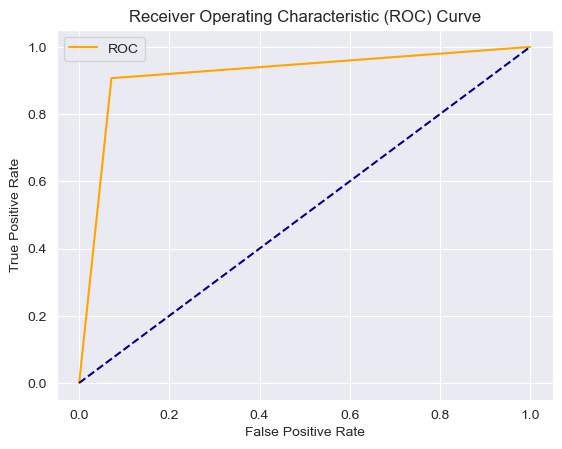

In [153]:
fpr, tpr, thresholds = roc_curve(ypred_r_rf,test_y)
plot_roc_curve(fpr,tpr)

In [154]:
#traing data
model.fit(train_x,train_y)
ypred_r_rf1=model.predict(train_x)


print('f1_score        ',f1_score(ypred_r_rf1,train_y))
print('accuracy_score  ',accuracy_score(ypred_r_rf1,train_y))
print('precision_score ',precision_score(ypred_r_rf1,train_y))
print('recall_score    ',recall_score(ypred_r_rf1,train_y))
print("ROC-AUC Score   ", roc_auc_score(ypred_r_rf1,train_y))
print('classification_report test_pca')
print(classification_report(ypred_r_rf1,train_y))
print('confusion_matrix')
print(confusion_matrix(ypred_r_rf1,train_y))

f1_score         1.0
accuracy_score   1.0
precision_score  1.0
recall_score     1.0
ROC-AUC Score    1.0
classification_report test_pca
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    100981
           1       1.00      1.00      1.00    101408

    accuracy                           1.00    202389
   macro avg       1.00      1.00      1.00    202389
weighted avg       1.00      1.00      1.00    202389

confusion_matrix
[[100981      0]
 [     0 101408]]


In [155]:
model_metrics['model'].append('Robust Scaled RandomForestClassifier')
model_metrics['accuracy'].append(accuracy_score(ypred_r_rf, test_y).round(2)*100)
model_metrics['f1_score'].append(f1_score(ypred_r_rf, test_y).round(2)*100)
model_metrics['precision'].append(precision_score(ypred_r_rf, test_y).round(2)*100)
model_metrics['recall'].append(recall_score(ypred_r_rf, test_y).round(2)*100)
model_metrics['confusion matrix'].append(confusion_matrix(ypred_r_rf,test_y).tolist())
model_metrics['roc_auc_score'].append(roc_auc_score(ypred_r_rf,test_y).round(2)*100)

#### Hyper

- Testing Data: Achieved an F1-score of 0.92, an accuracy score of 0.92, and a ROC-AUC score of 0.92.
- Training Data: The model achieved perfect scores of 1.0 for both F1-score and accuracy on the training data.
- Inference: The Random Forest model demonstrates strong performance on both datasets, indicating robustness and good generalization.

## Naive bayes

In [156]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()

In [157]:
model.fit(train_x,train_y)
ypred_r_nb=model.predict(test_x)


print('f1_score        ',f1_score(ypred_r_nb,test_y))
print('accuracy_score  ',accuracy_score(ypred_r_nb,test_y))
print('precision_score ',precision_score(ypred_r_nb,test_y))
print('recall_score    ',recall_score(ypred_r_nb,test_y))
print("ROC-AUC Score   ", roc_auc_score(ypred_r_nb,test_y))
print('classification_report test_pca')
print(classification_report(ypred_r_nb,test_y))
print('confusion_matrix')
print(confusion_matrix(ypred_r_nb,test_y))


f1_score         0.8691873306192619
accuracy_score   0.8781892363620193
precision_score  0.8104281229823898
recall_score     0.9371331479765215
ROC-AUC Score    0.8852609602758534
classification_report test_pca
              precision    recall  f1-score   support

           0       0.95      0.83      0.89     51107
           1       0.81      0.94      0.87     38844

    accuracy                           0.88     89951
   macro avg       0.88      0.89      0.88     89951
weighted avg       0.89      0.88      0.88     89951

confusion_matrix
[[42592  8515]
 [ 2442 36402]]


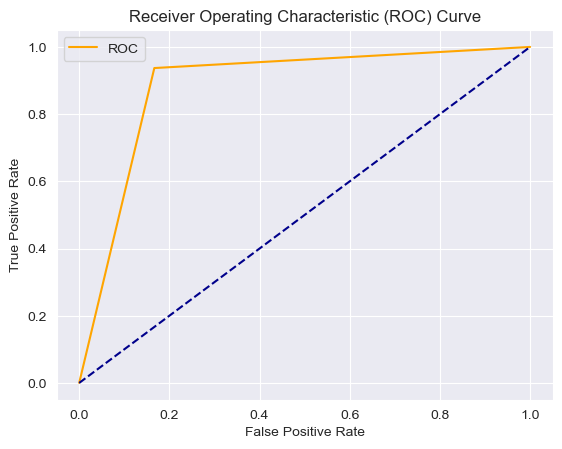

In [158]:
fpr, tpr, thresholds = roc_curve(ypred_r_nb,test_y)
plot_roc_curve(fpr,tpr)

In [159]:
#traing data
model.fit(train_x,train_y)
ypred_r_nb1=model.predict(train_x)


print('f1_score        ',f1_score(ypred_r_nb1,train_y))
print('accuracy_score  ',accuracy_score(ypred_r_nb1,train_y))
print('precision_score ',precision_score(ypred_r_nb1,train_y))
print('recall_score    ',recall_score(ypred_r_nb1,train_y))
print("ROC-AUC Score   ", roc_auc_score(ypred_r_nb1,train_y))
print('classification_report test_pca')
print(classification_report(ypred_r_nb1,train_y))
print('confusion_matrix')
print(confusion_matrix(ypred_r_nb1,train_y))

f1_score         0.8688404876809754
accuracy_score   0.8775328698694099
precision_score  0.8095515146733986
recall_score     0.9375
ROC-AUC Score    0.8846495305736756
classification_report test_pca
              precision    recall  f1-score   support

           0       0.95      0.83      0.89    114821
           1       0.81      0.94      0.87     87568

    accuracy                           0.88    202389
   macro avg       0.88      0.88      0.88    202389
weighted avg       0.89      0.88      0.88    202389

confusion_matrix
[[95508 19313]
 [ 5473 82095]]


In [160]:
model_metrics['model'].append('Robust Scaled naive bayes')
model_metrics['accuracy'].append(accuracy_score(ypred_r_nb, test_y).round(2)*100)
model_metrics['f1_score'].append(f1_score(ypred_r_nb, test_y).round(2)*100)
model_metrics['precision'].append(precision_score(ypred_r_nb, test_y).round(2)*100)
model_metrics['recall'].append(recall_score(ypred_r_nb, test_y).round(2)*100)
model_metrics['confusion matrix'].append(confusion_matrix(ypred_r_nb,test_y).tolist())
model_metrics['roc_auc_score'].append(roc_auc_score(ypred_r_nb,test_y).round(2)*100)

- Testing Data: Showed decent performance with an F1-score of 0.87 and an accuracy score of 0.88.
- Training Data: Similar performance on the training data with an F1-score of 0.87 and an accuracy score of 0.88.
- Inference:The Naive Bayes model performs reasonably well, but its performance is slightly lower compared to other models.

# Model Comparision

In [237]:
model_metrics_df=pd.DataFrame(model_metrics)
model_metrics_df.set_index('model',inplace=True)
model_metrics_df.sort_values(by='roc_auc_score',ascending=False)

roc_auc_score  f1_score  \
model                                                                         
Robust Scaled ANN hyperparameter tuned                      94.00     94.00   
Robust Scaled RandomForestClassifier                        92.00     92.00   
Robust Scaled  ANN                                          91.00     91.00   
Robust Scaled XGB                                           90.00     90.00   
Robust Scaled naive bayes                                   89.00     87.00   
Robust Scaled LogisticRegression                            83.00     84.00   
Robust Scaled DecisionTree                                  83.00     83.00   
standard scaled Random Forest Classifier                    65.00     36.00   
standard scaled Logistic Regression                         63.00     42.00   
Standard scaled Logistic Regression hyperparame...          63.00     42.00   
standard scaled Decision Tree hyperparameters t...          63.00     41.00   
standard scaled XGB                                         63.00     38.00   
standard scaled ANN hyperparameters tuned                   62.00     35.00   
standard scaled ANN                                         60.00     31.00   
standard scaled Decision Tree                               57.00     30.00   
standard scaled naive bayes                                 54.00     15.00   

                                                    accuracy  precision  \
model                                                                     
Robust Scaled ANN hyperparameter tuned                 93.00      96.00   
Robust Scaled RandomForestClassifier                   92.00      93.00   
Robust Scaled  ANN                                     91.00      93.00   
Robust Scaled XGB                                      90.00      91.00   
Robust Scaled naive bayes                              88.00      81.00   
Robust Scaled LogisticRegression                       83.00      84.00   
Robust Scaled DecisionTree                             83.00      85.00   
standard scaled Random Forest Classifier               87.00      36.00   
standard scaled Logistic Regression                    79.00      76.00   
Standard scaled Logistic Regression hyperparame...     79.00      76.00   
standard scaled Decision Tree hyperparameters t...     78.00      76.00   
standard scaled XGB                                    85.00      46.00   
standard scaled ANN hyperparameters tuned              85.00      40.00   
standard scaled ANN                                    84.00      36.00   
standard scaled Decision Tree                          77.00      48.00   
standard scaled naive bayes                            85.00      12.00   

                                                    recall  \
model                                                        
Robust Scaled ANN hyperparameter tuned               91.00   
Robust Scaled RandomForestClassifier                 91.00   
Robust Scaled  ANN                                   89.00   
Robust Scaled XGB                                    90.00   
Robust Scaled naive bayes                            94.00   
Robust Scaled LogisticRegression                     83.00   
Robust Scaled DecisionTree                           81.00   
standard scaled Random Forest Classifier             36.00   
standard scaled Logistic Regression                  29.00   
Standard scaled Logistic Regression hyperparame...   29.00   
standard scaled Decision Tree hyperparameters t...   28.00   
standard scaled XGB                                  32.00   
standard scaled ANN hyperparameters tuned            32.00   
standard scaled ANN                                  27.00   
standard scaled Decision Tree                        21.00   
standard scaled naive bayes                          18.00   

                                                                  confusion matrix  
model                                                                       

In [198]:
#model_metrics['confusion matrix'].pop(-1)

[[35288, 1218], [9288, 3772]]

In [194]:
#model_metrics

{'model': ['Robust Scaled LogisticRegression',
  'Robust Scaled  ANN',
  'Robust Scaled ANN hyperparameter tuned',
  'Robust Scaled XGB',
  'Robust Scaled DecisionTree',
  'Robust Scaled RandomForestClassifier',
  'Robust Scaled naive bayes'],
 'roc_auc_score': [83.0, 91.0, 94.0, 90.0, 83.0, 92.0, 89.0],
 'f1_score': [84.0, 91.0, 94.0, 90.0, 83.0, 92.0, 87.0],
 'accuracy': [83.0, 91.0, 93.0, 90.0, 83.0, 92.0, 88.0, 79.0],
 'precision': [84.0, 93.0, 96.0, 91.0, 85.0, 93.0, 81.0, 76.0],
 'recall': [83.0, 89.0, 91.0, 90.0, 81.0, 91.0, 94.0, 28.999999999999996],
 'confusion matrix': [[[37180, 7057], [7854, 37860]],
  [[39965, 3077], [5069, 41840]],
  [[40928, 1748], [4106, 43169]],
  [[40350, 4004], [4684, 40913]],
  [[36051, 6562], [8983, 38355]],
  [[40745, 3135], [4289, 41782]],
  [[42592, 8515], [2442, 36402]],
  [[35288, 1218], [9288, 3772]]]}

# Conclusion


- The unconventional approach of using RobustScaler before train-test split, followed by SMOTE, and then model training seems to have positively impacted model performance.
- All models show consistent performance on both testing and training data, indicating good generalization and no signs of overfitting.
- The top-performing models based on F1-score,AUC and accuracy are the
                                     - ANN,
                                     - XGBoost
                                     - Random Forest Classifier.


# challenges Faced

1. *Unnamed Columns*: The dataset arrived without column names, making it challenging to interpret the features and understand their significance.

2. *Model Interpretability*: The lack of feature names made it difficult to interpret the model's predictions and understand which features were driving the results.

3. *Memory Constraints*: The dataset's size tested the limits of available memory, requiring efficient strategies to process the data without running into memory errors.

4. *Data Preprocessing Complexity*: The preprocessing steps, including handling a large number of outliers, scaling, SMOTE, and train-test splits, added complexity to the workflow and required careful handling to avoid errors.

5. *Handling Outliers*: The dataset contained a large number of outliers, which posed challenges in deciding how to treat them appropriately without distorting the underlying data distribution or introducing bias.

6. *Large Dataset Management*: Managing a large number of data points required efficient data handling techniques to ensure smooth processing.

7. *Hyperparameter Tuning Complexity*: Tuning hyperparameters was challenging due to the large dataset size and time constraints, limiting the depth of exploration.